# IPL Player valuation performed using clustering techniques

Note : Run the ipynb file to view the widgets

In [5]:
#Importing neccessary libraries
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from functools import reduce
from sklearn.cluster import DBSCAN
from numpy.random import uniform
from random import sample
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [6]:
#Setting the runtime configuration (rc) parameters
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [7]:
#Reading the three csv files using pandas
df = pd.read_csv("C:\\Users\\jagan\\OneDrive\\Documents\\cw term2\\RP\DATA\\ipl3seasonsbattingstats.csv")
df1 = pd.read_csv("C:\\Users\\jagan\\OneDrive\\Documents\\cw term2\\RP\DATA\\ipl3seasonsbowling.csv")
dfauc = pd.read_csv("C:\\Users\\jagan\\OneDrive\\Documents\\cw term2\\RP\DATA\\ipl2022auction.csv")

In [8]:
#Displaying the head of the batsmen dataframe
df.head()

PLAYER  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  50  4s  \
0       K L Rahul   14    14   2   670  132*  55.83  518  129.34    1   5  58   
1  Shikhar Dhawan   17    17   3   618  106*  44.14  427  144.73    2   4  67   
2    David Warner   16    16   2   548   85*  39.14  407  134.64    0   4  52   
3    Shreyas Iyer   17    17   2   519   88*   34.6  421  123.27    0   3  40   
4    Ishan Kishan   14    13   4   516    99  57.33  354  145.76    0   4  36   

   6s  
0  23  
1  12  
2  14  
3  16  
4  30

In [9]:
#Displaying the head of the bowlers dataframe
df1.head()

PLAYER  Mat  Runs  Wkts  Econ     SR
0     Kagiso Rabada   17   548    30  8.34  13.13
1    Jasprit Bumrah   15   404    27  6.73  13.33
2       Trent Boult   15   457    25  7.97  13.76
3     Anrich Nortje   16   512    22  8.39  16.63
4  Yuzvendra Chahal   15   405    21  7.08  16.33

In [10]:
#Displaying the head of the auctions dataframe
dfauc.head()

Unnamed: 0           PLAYER  Base Price         TYPE  COST IN INR (CR.)  \
0           0      Rashid Khan  Draft Pick       BOWLER               15.0   
1           1    Hardik Pandya  Draft Pick  ALL-ROUNDER               15.0   
2           2  Lockie Ferguson        2 Cr       BOWLER               10.0   
3           3    Rahul Tewatia     40 Lakh  ALL-ROUNDER                9.0   
4           4     Shubman Gill  Draft Pick       BATTER                8.0   

   Cost IN US $ (000)  Cost in GB Pounds(000) 2021 Squad            Team  
0              1950.0                  1618.5        SRH  Gujarat Titans  
1              1950.0                  1618.5         MI  Gujarat Titans  
2              1300.0                  1079.0        KKR  Gujarat Titans  
3              1170.0                   971.1         RR  Gujarat Titans  
4              1040.0                   863.2        KKR  Gujarat Titans

In [11]:
#removing \xa0 from the csv files
df['PLAYER'] = df['PLAYER'].apply(lambda x: str(x).replace(u'\xa0', u' '))
df1['PLAYER'] = df1['PLAYER'].apply(lambda x: str(x).replace(u'\xa0', u' '))
#Creating a copy of the batting and bowling files
dfbat = df.copy()
dfbow = df1.copy()

In [12]:
#Dropping SR column from the batsmen dataframe
dfbat.drop("SR", axis=1, inplace=True)
#Dropping SR and Econ column from the bowlers dataframe
dfbow.drop(columns = ['SR','Econ'], axis=1, inplace=True)

#The three season stats are grouped up using Sum and Mean aggregate functions
dfbat1 =dfbat.groupby(['PLAYER']).sum()
dfbow1 =dfbow.groupby(['PLAYER']).sum()
dfbat2 =df.groupby(['PLAYER']).mean()
dfbow2 =df1.groupby(['PLAYER']).mean()

#The mean values of SR and Econ are added up to the summed dataframes
dfbat1['SR'] = dfbat2['SR']
dfbow1['SR'] = dfbow2['SR']
dfbow1['Econ'] = dfbow2['Econ']

#The unique players names are stored as variables 
group_names_batsman = df.PLAYER.unique()
group_names_bowler = df1.PLAYER.unique()

In [13]:
#Displaying batsman names
group_names_batsman

array(['K L Rahul', 'Shikhar Dhawan', 'David Warner', 'Shreyas Iyer',
       'Ishan Kishan', 'Quinton De Kock', 'Suryakumar Yadav',
       'Devdutt Padikkal', 'Virat Kohli', 'AB de Villiers',
       'Faf du Plessis', 'Shubman Gill', 'Manish Pandey',
       'Mayank Agarwal', 'Eoin Morgan', 'Sanju Samson', 'Ambati Rayudu',
       'Nicholas Pooran', 'Nitish Rana', 'Marcus Stoinis',
       'Jonny Bairstow', 'Rishabh Pant', 'Rohit Sharma', 'Jos Buttler',
       'Kane Williamson', 'Steve Smith', 'Shane Watson', 'Chris Gayle',
       'Ben Stokes', 'Hardik Pandya', 'Aaron Finch', 'Kieron Pollard',
       'Rahul Tewatia', 'Ravindra Jadeja', 'Rahul Tripathi',
       'Prithvi Shaw', 'Wriddhiman Saha', 'Ruturaj Gaikwad', 'MS Dhoni',
       'Robin Uthappa', 'Sam Curran', 'Shimron Hetmyer', 'Dinesh Karthik',
       'Pat Cummins', 'Priyam Garg', 'Mandeep Singh', 'Shivam Dube',
       'Sunil Narine', 'Andre Russell', 'Axar Patel', 'Jofra Archer',
       'Ajinkya Rahane', 'Washington Sundar', 'Abdul Sa

In [14]:
#Displaying bowlers names
group_names_bowler

array(['Kagiso Rabada', 'Jasprit Bumrah', 'Trent Boult', 'Anrich Nortje',
       'Yuzvendra Chahal', 'Rashid Khan', 'Jofra Archer',
       'Mohammad Shami', 'Varun Chakravarthy', 'T Natarajan',
       'Rahul Chahar', 'Sandeep Sharma', 'Jason Holder',
       'Ravichandran Ashwin', 'Sam Curran', 'Marcus Stoinis',
       'Ravi Bishnoi', 'Deepak Chahar', 'Pat Cummins', 'Chris Morris',
       'Mohammed Siraj', 'James Pattinson', 'Rahul Tewatia',
       'Murugan Ashwin', 'Shardul Thakur', 'Shreyas Gopal', 'Axar Patel',
       'Shivam Mavi', 'Arshdeep Singh', 'Kartik Tyagi', 'Chris Jordan',
       'Lungi Ngidi', 'Washington Sundar', 'Khaleel Ahmed', 'Isuru Udana',
       'Lockie Ferguson', 'Krunal Pandya', 'Navdeep Saini',
       'Dwayne Bravo', 'Ravindra Jadeja', 'Sheldon Cottrell',
       'Piyush Chawla', 'Andre Russell', 'Nathan Coulter-Nile',
       'Sunil Narine', 'Shahbaz Nadeem', 'Karn Sharma',
       'Kamlesh Nagarkoti', 'Vijay Shankar', 'Shivam Dube',
       'Kieron Pollard', 'Prasid

In [15]:
#Normalising the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dfbat1)
normalized_data1 = scaler.fit_transform(dfbow1)
#Creating dataframes for normalized data
dfbat3 = pd.DataFrame(normalized_data)
dfbow3 = pd.DataFrame(normalized_data1)
#Naming the columns 
dfbat3.columns =['Mat', 'Inns', 'NO', 'Runs', 'BF', '100', '50', '4s', '6s', 'SR']
dfbow3.columns =['Mat', 'Runs', 'Wkts', 'SR', 'Econ']

<Figure size 3200x1200 with 0 Axes>

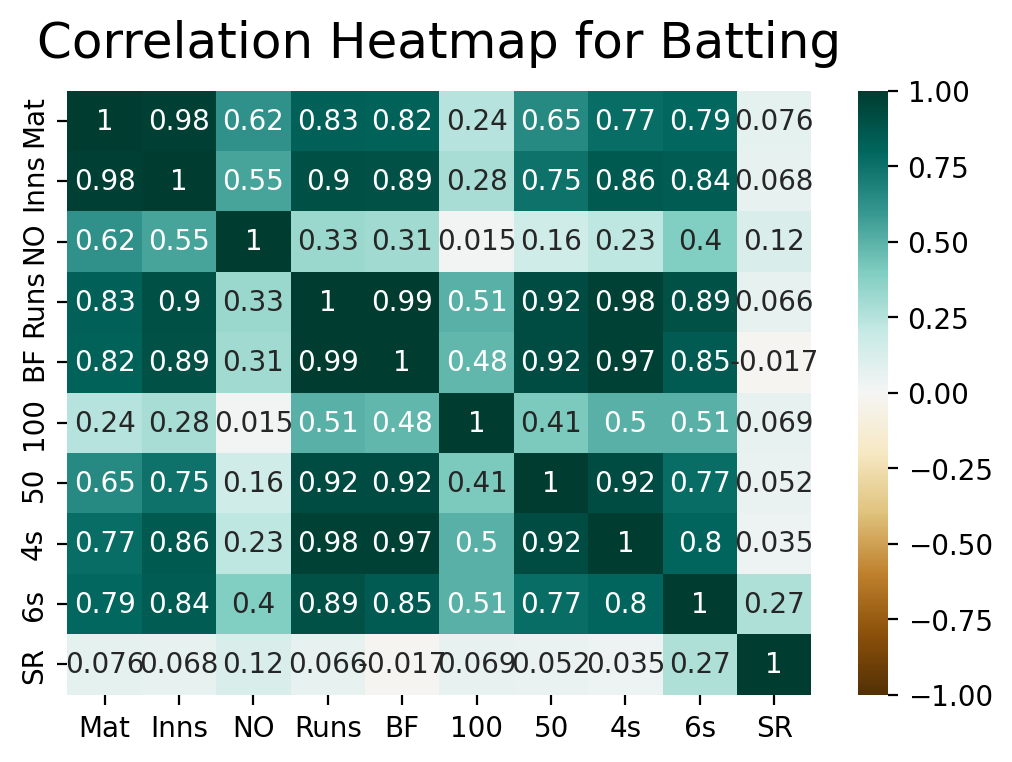

<Figure size 3200x1200 with 0 Axes>

In [16]:
#Creating a correlation heatmap for Batting
heatmap = sns.heatmap(dfbat3.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for Batting', fontdict={'fontsize':18}, pad=12);
#Setting the figure size
plt.figure(figsize=(16, 6))

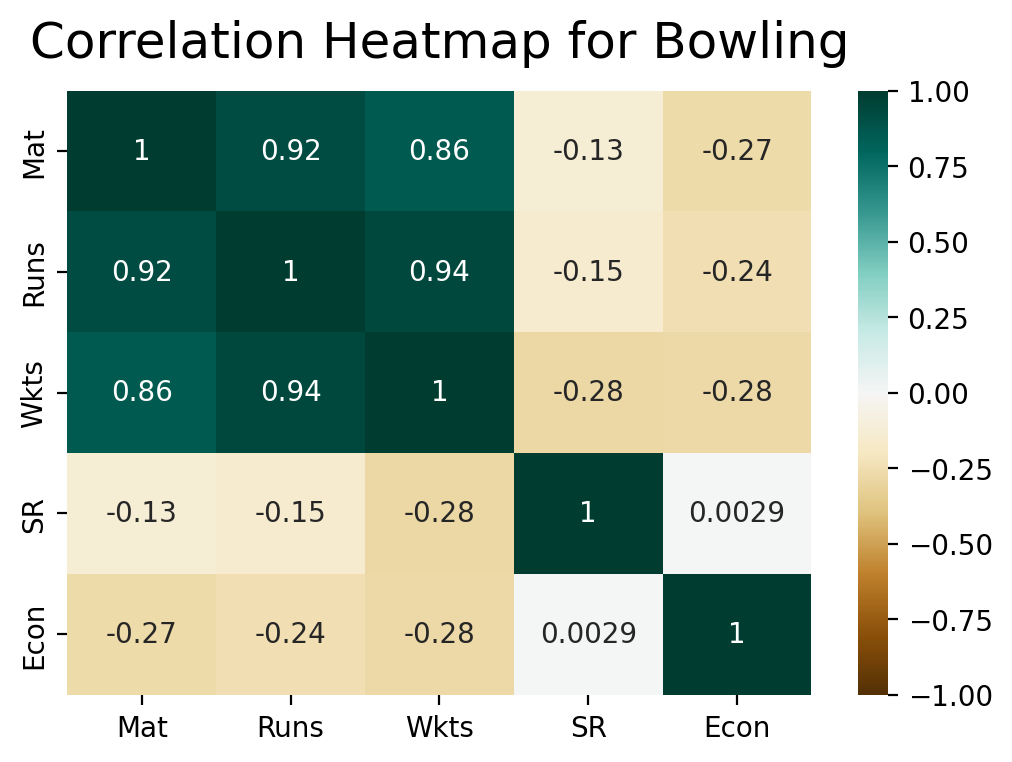

In [17]:
#Creating a correlation heatmap for Bowling
heatmap = sns.heatmap(dfbow3.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for Bowling', fontdict={'fontsize':18}, pad=12);


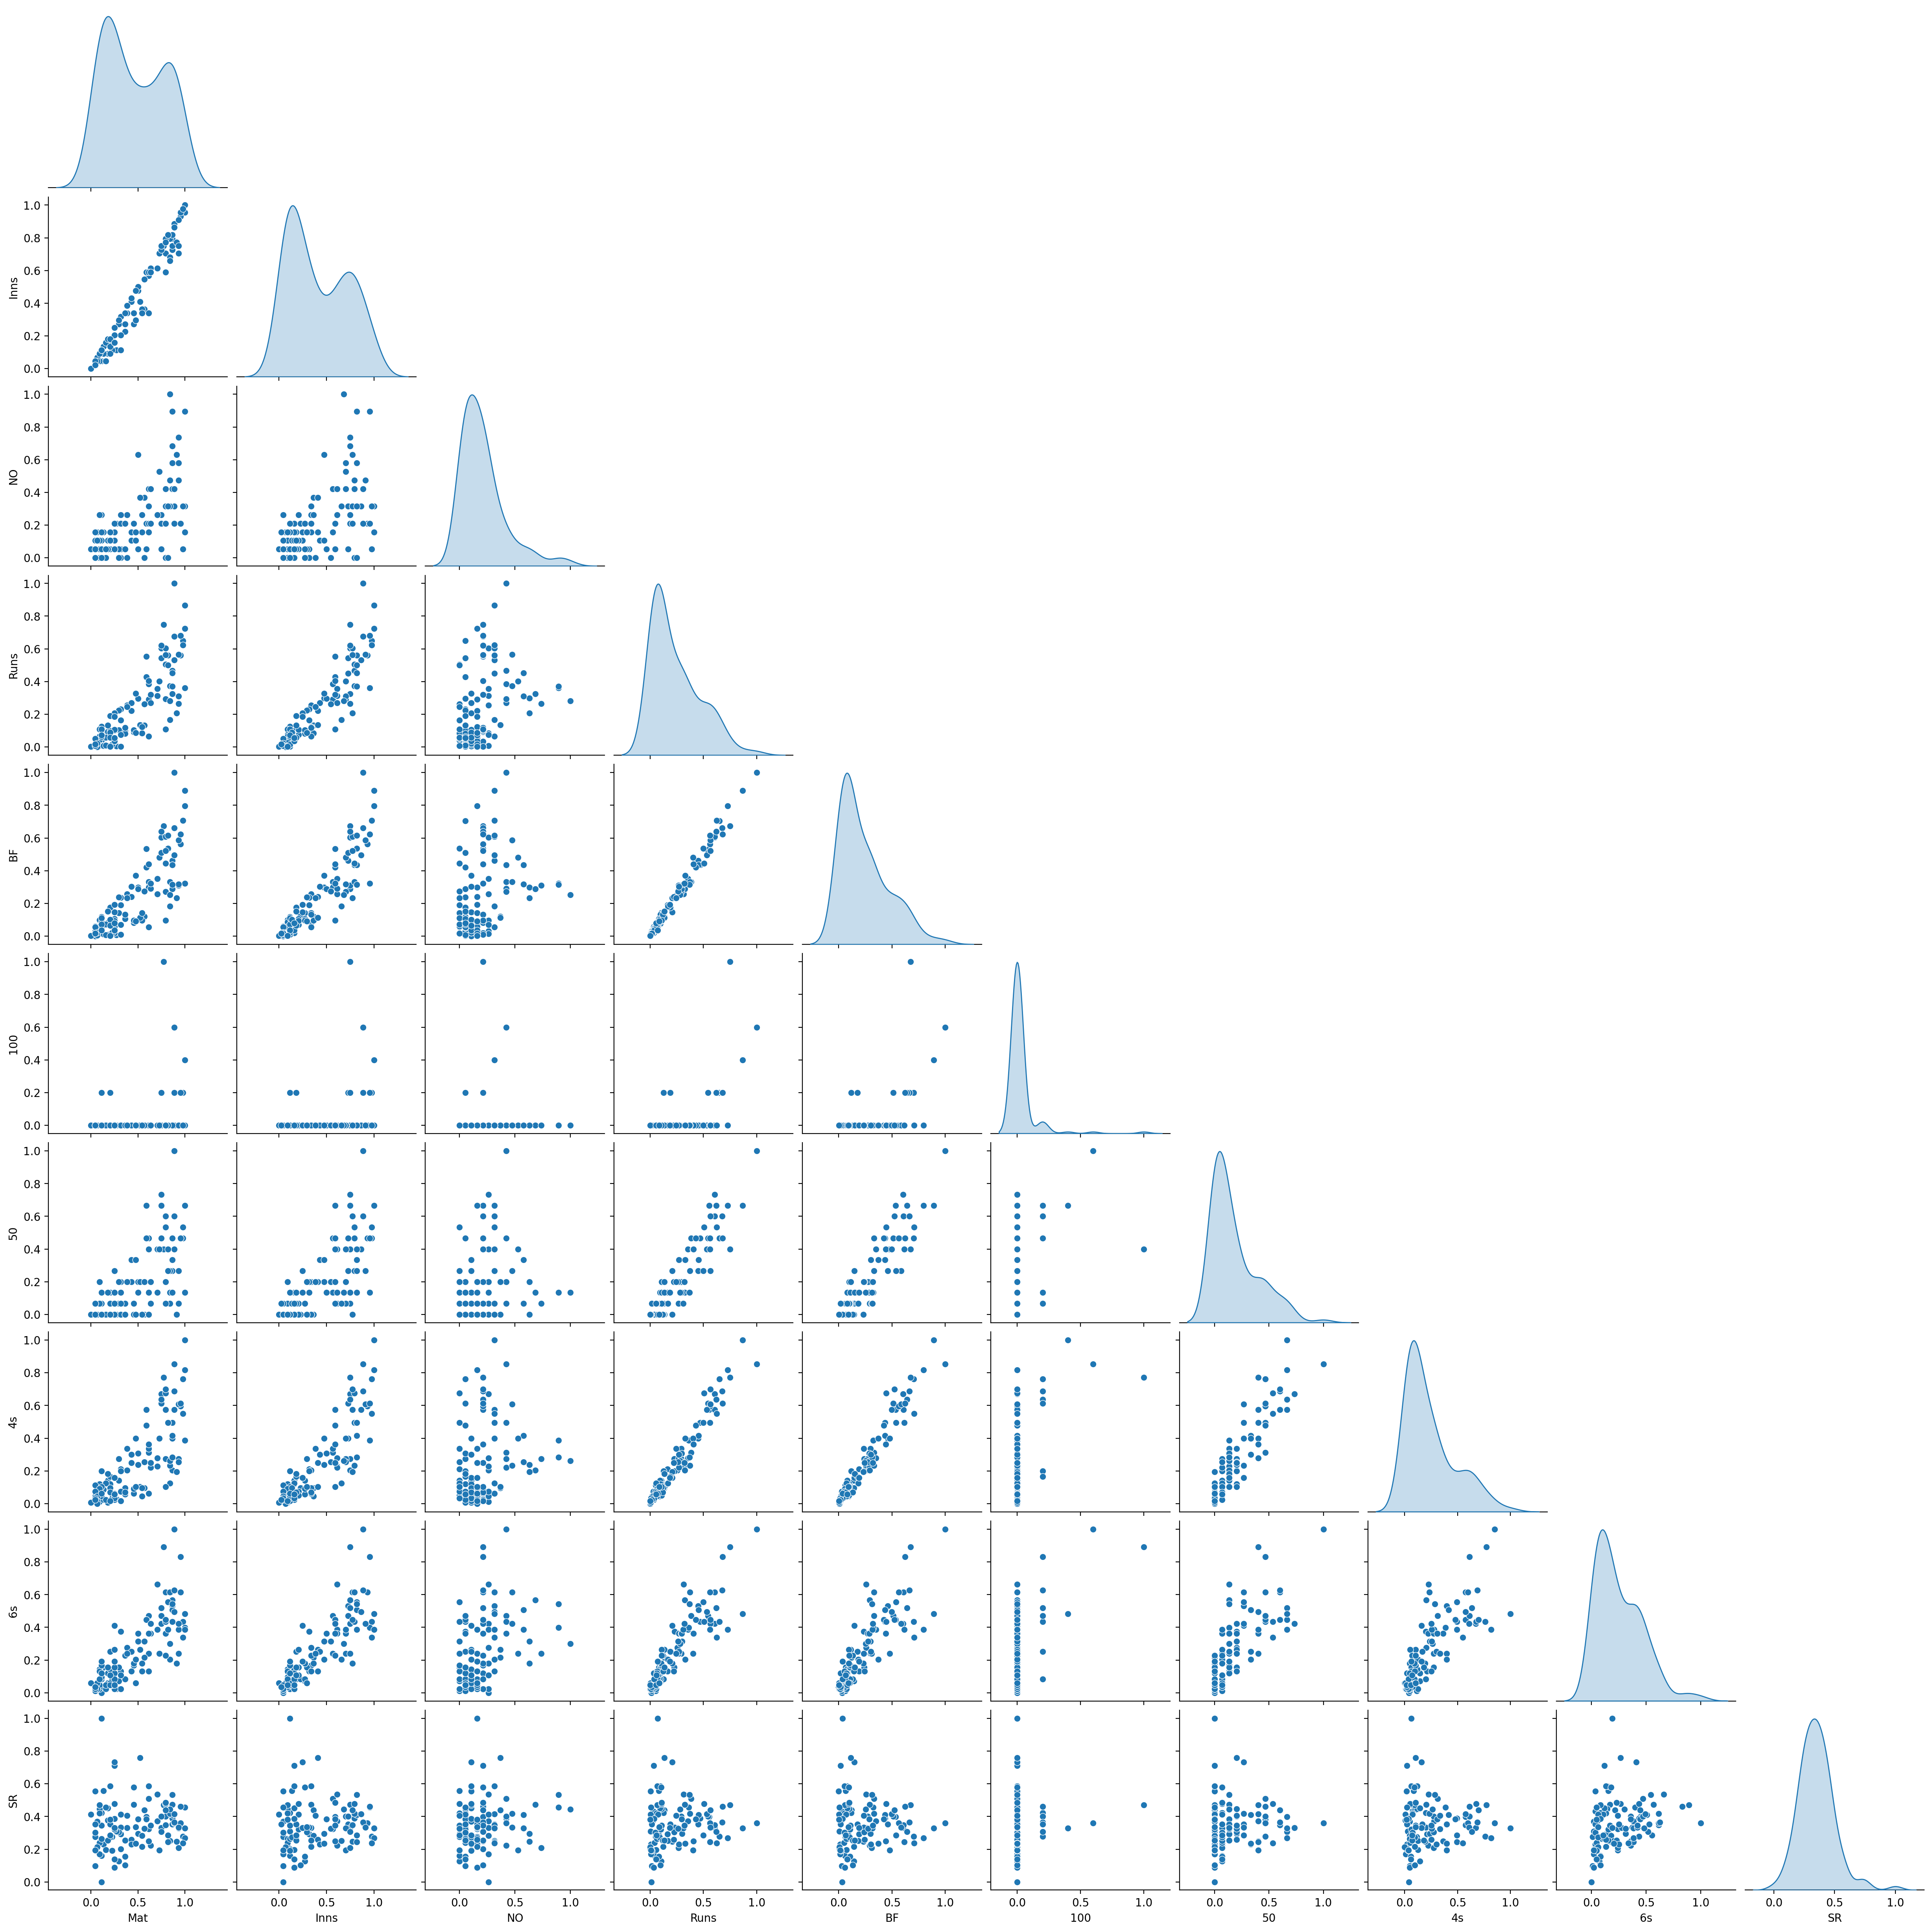

In [18]:
#Creating a pairplot for batsman dataframe
sns.pairplot(dfbat3,corner=True,diag_kind="kde")
plt.show()

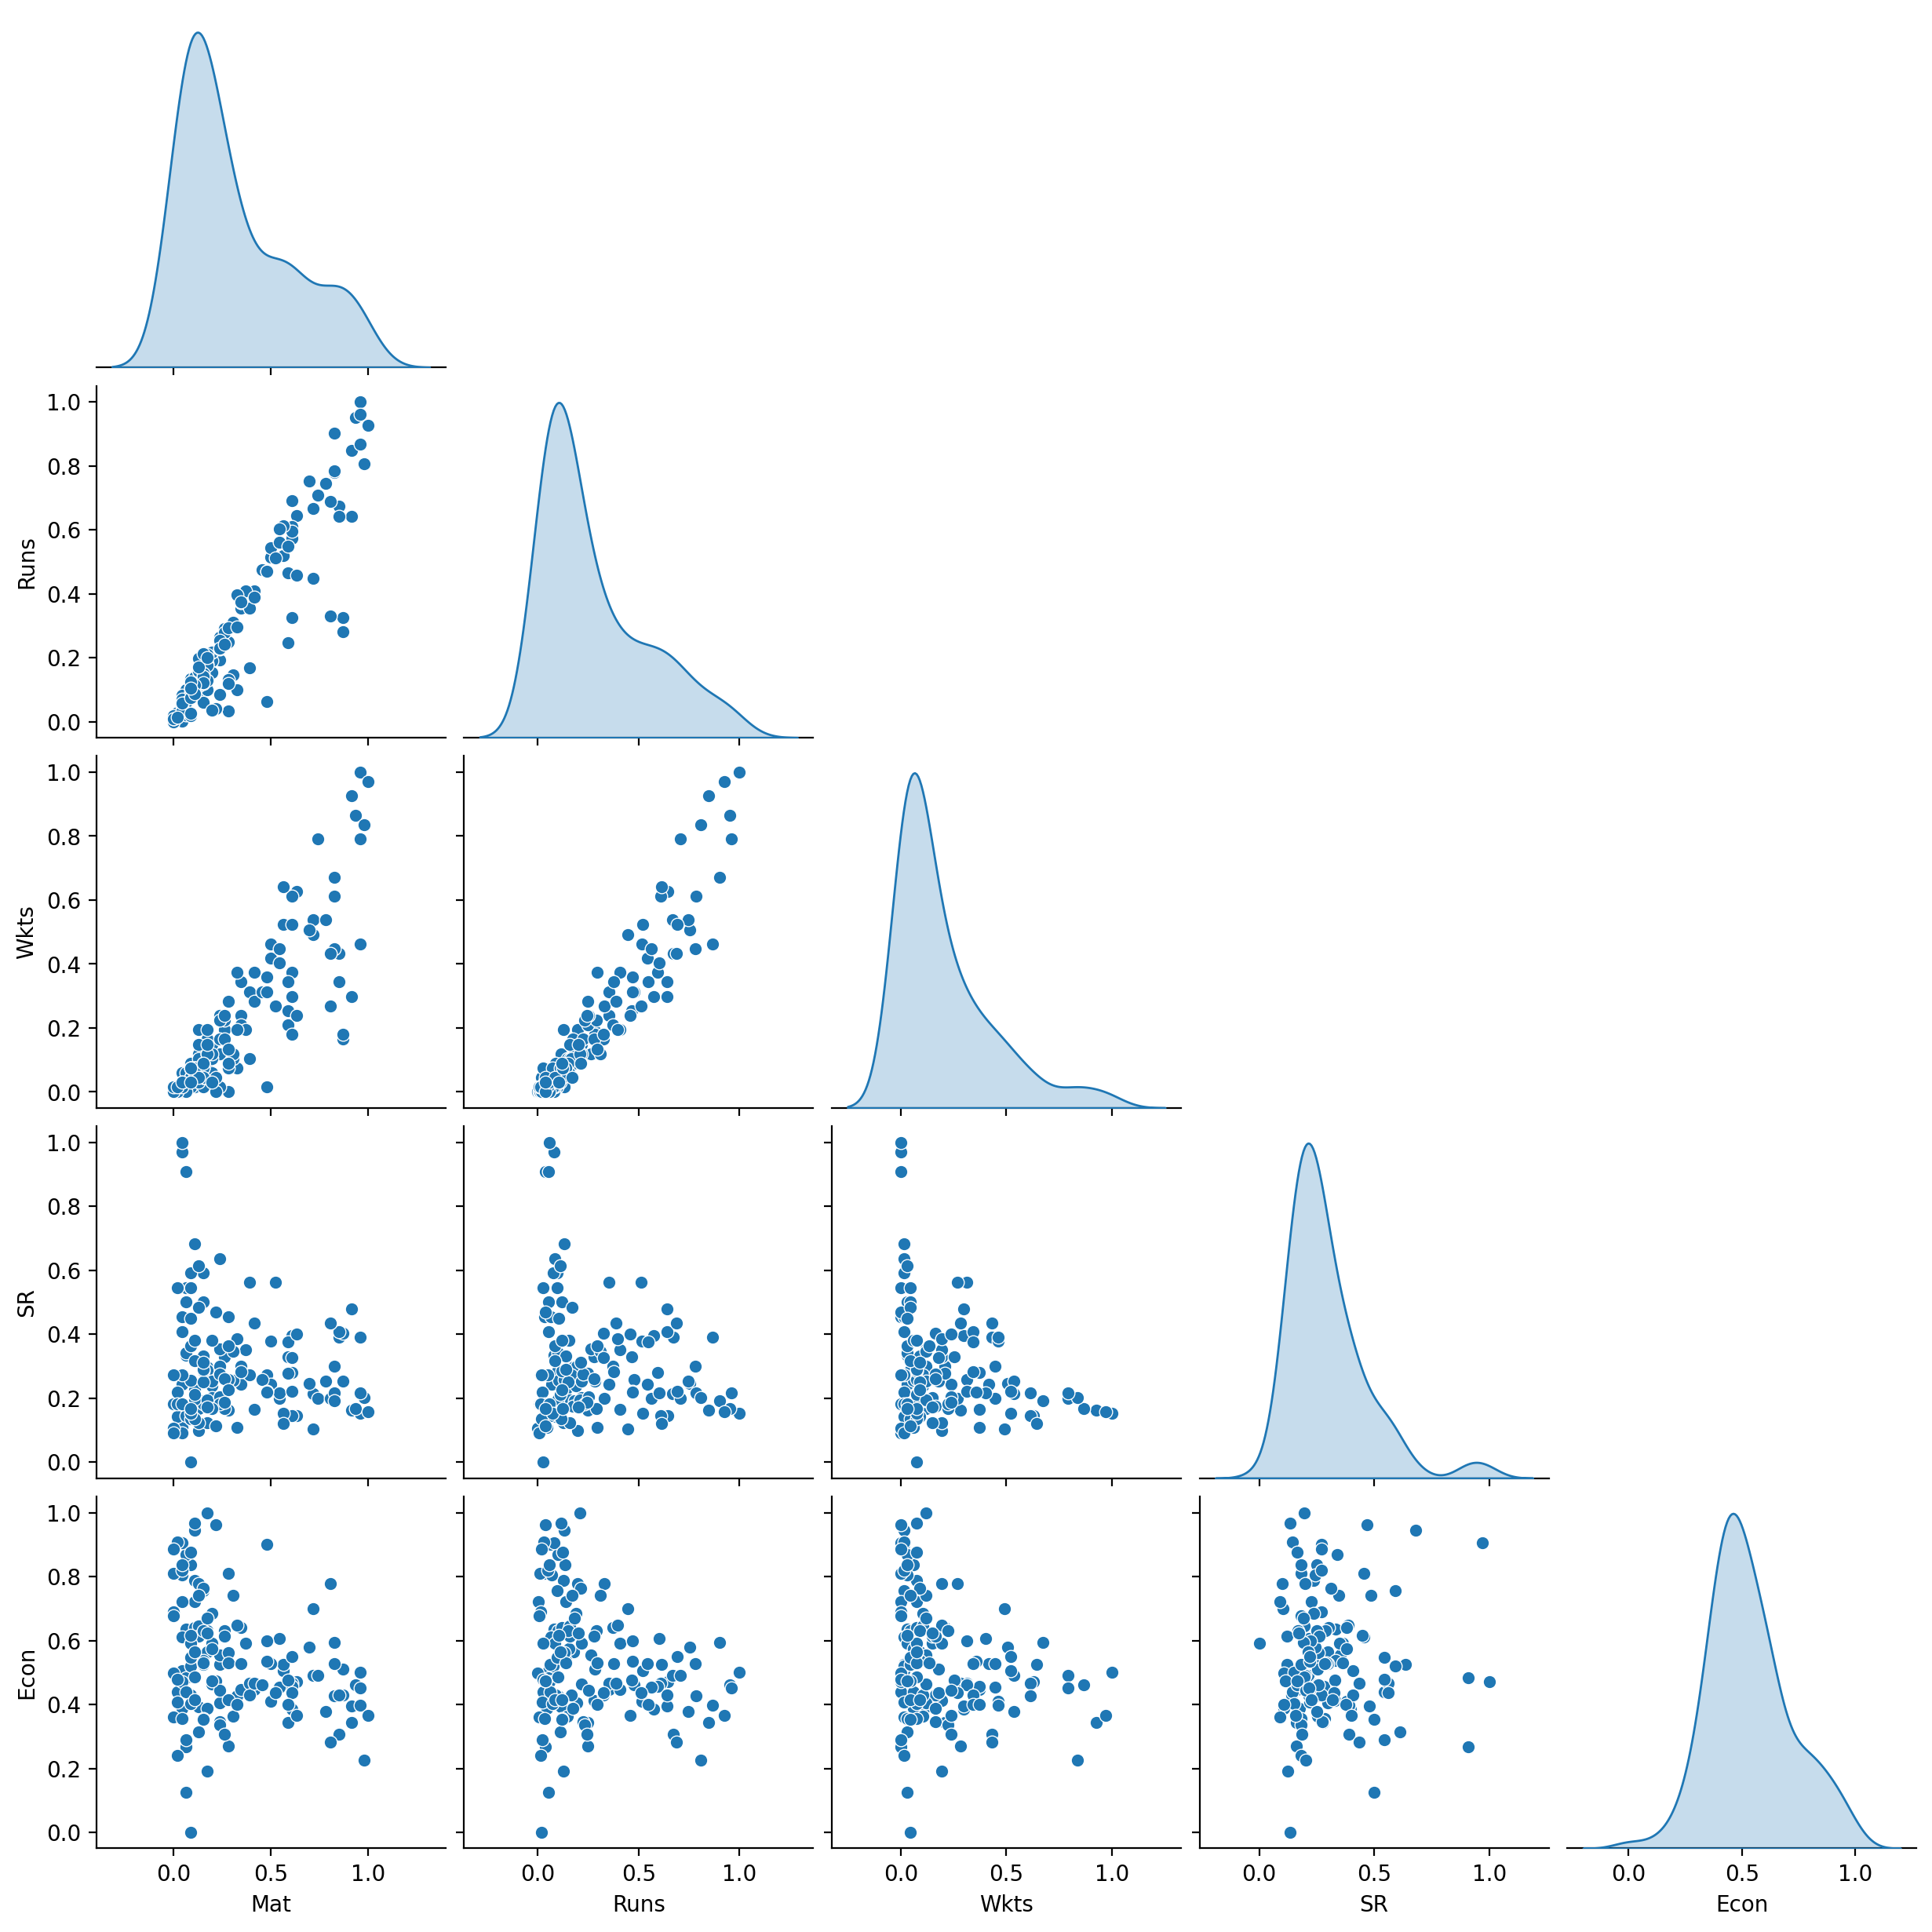

In [19]:
#Creating a pairplot for bowlers dataframe
sns.pairplot(dfbow3,corner=True,diag_kind="kde")
plt.show()

In [20]:
#Creating a new column for the auction cost in Pounds
dfauc['Cost in GBP'] = dfauc['Cost in GB Pounds(000)']*1000

#Filtering players who are unsold in the auction
df_auc1 = dfauc[dfauc['Team'] != 'Unsold']
#Removing the first column in the dataframe
df_auc1 = df_auc1.loc[:, ~df_auc1.columns.str.contains('^Unnamed')]
#Dropping the 2021 Squad column from the dataframe
df_auc1 = df_auc1.drop('2021 Squad', axis=1)

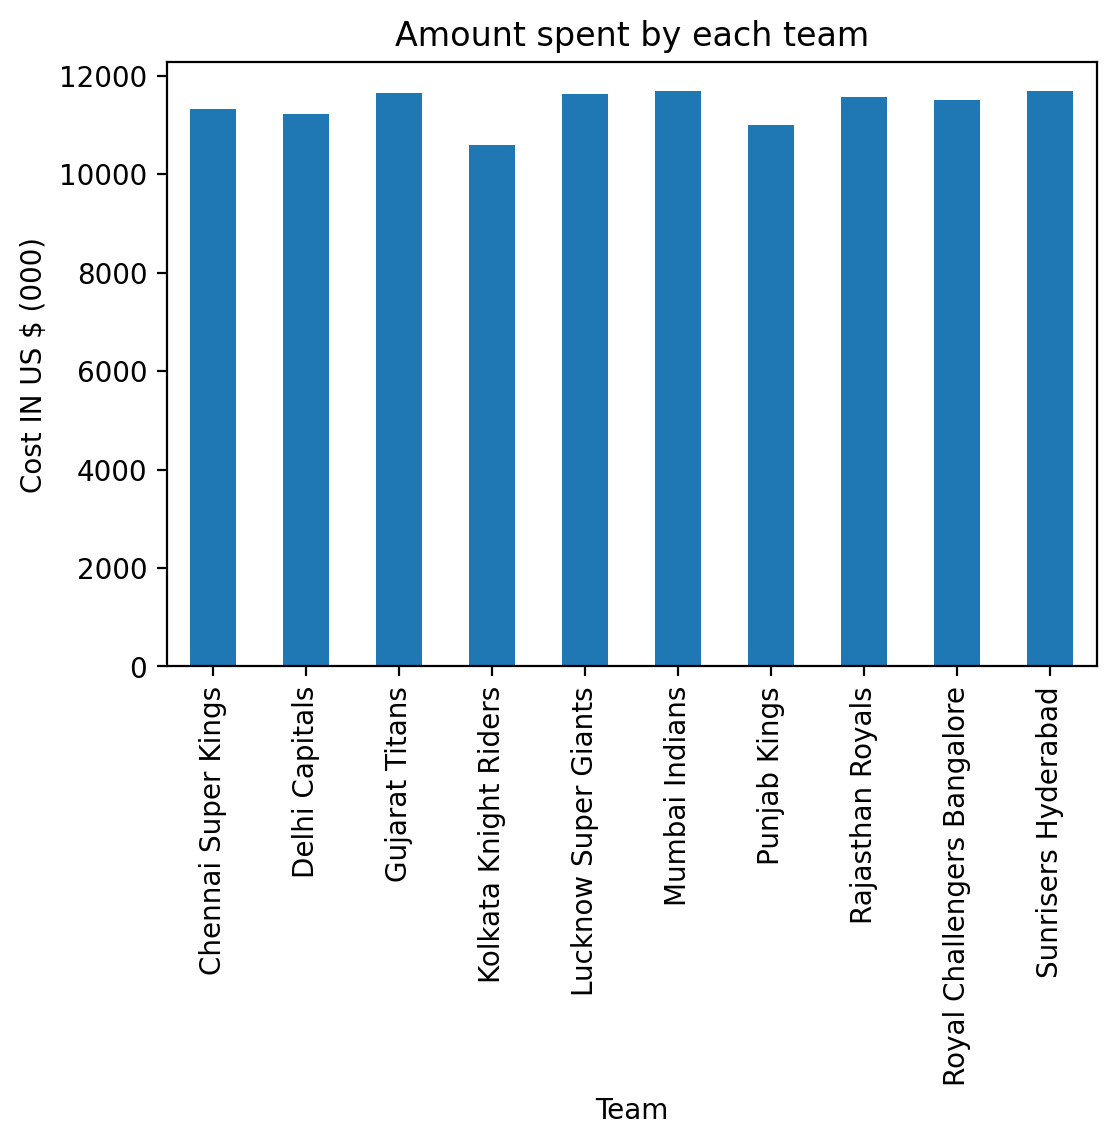

In [21]:
#Using group by to find Amount spent by each team and plotting it
df_auc2 =df_auc1.groupby(['Team']).sum()
df_auc2['Cost IN US $ (000)'].plot.bar()
plt.ylabel("Cost IN US $ (000)")
plt.title("Amount spent by each team")
plt.show()


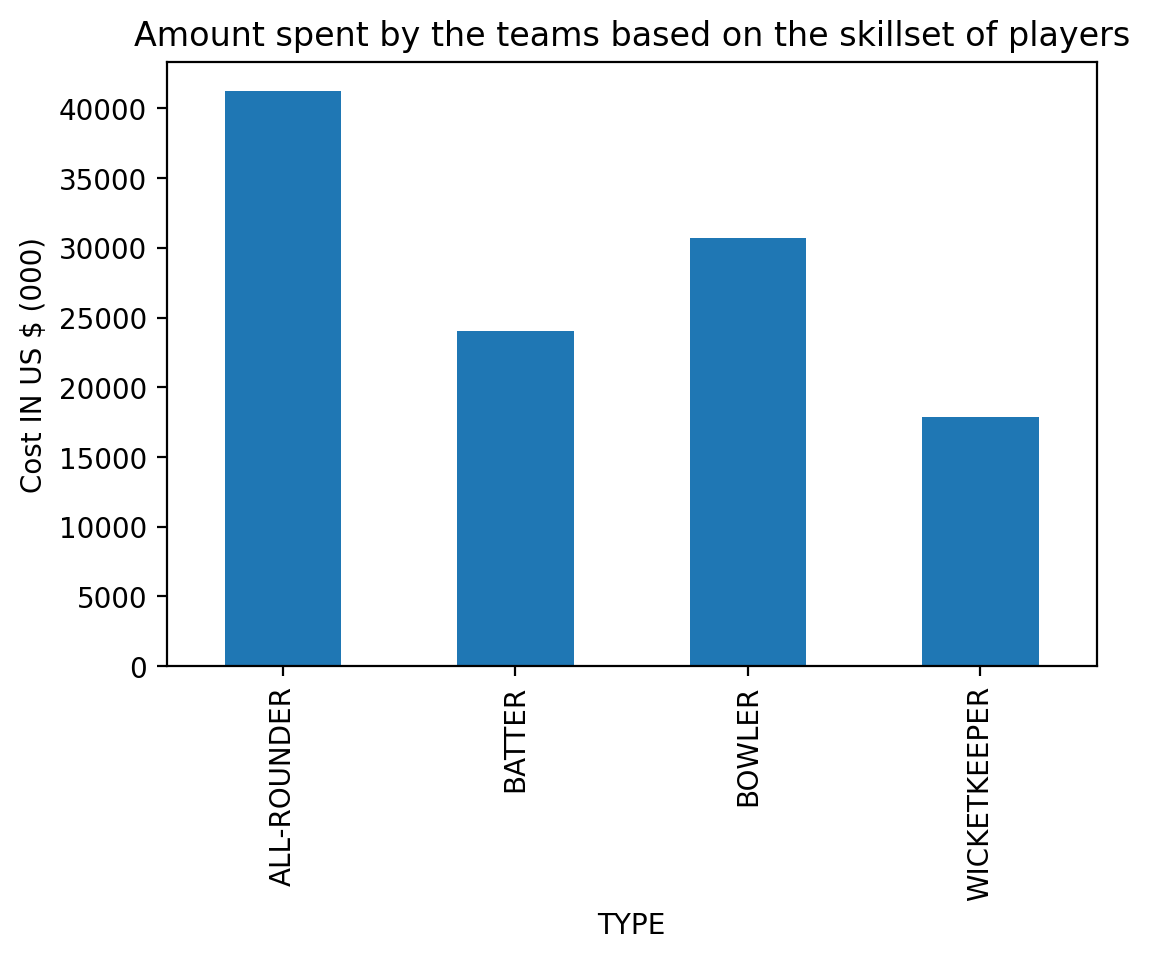

In [22]:
#Using group by to find Amount spent by the teams based on the skillset of players and plotting it
df_auc3 =df_auc1.groupby(['TYPE']).sum()
df_auc3['Cost IN US $ (000)'].plot.bar()
plt.ylabel("Cost IN US $ (000)")
plt.title("Amount spent by the teams based on the skillset of players")
plt.show()

In [23]:
#Merging the three dataframes into a final dataframe
dffinal=reduce(lambda x,y: pd.merge(x,y, on='PLAYER', how='outer'), [dfbat1, dfbow1, df_auc1])
#Filtering the players who are sold in the 2022 auction only
dffinal1 = dffinal[dffinal['Cost IN US $ (000)'].notna()]
#Creating a copy of the dataframe 
players = dffinal1.copy()




In [24]:
#Displaying the head of players dataframe
players.head()

PLAYER  Mat_x  Inns   NO  Runs_x     BF  100   50    4s    6s  \
2      Abdul Samad   23.0  18.0  4.0   222.0  152.0  0.0  0.0  12.0  14.0   
3  Abhinav Manohar    8.0   7.0  1.0   108.0   75.0  0.0  0.0  14.0   3.0   
4  Abhishek Sharma   30.0  28.0  3.0   595.0  451.0  0.0  2.0  60.0  20.0   
5    Aiden Markram   20.0  18.0  5.0   527.0  393.0  0.0  3.0  37.0  23.0   
6   Ajinkya Rahane   16.0  15.0  0.0   246.0  235.0  0.0  1.0  26.0   6.0   

   ...  Wkts  SR_y    Econ  Base Price         TYPE  COST IN INR (CR.)  \
2  ...   2.0  24.0  11.355    Retained  ALL-ROUNDER                4.0   
3  ...   NaN   NaN     NaN     20 Lakh       BATTER                2.6   
4  ...   6.0  22.5   7.750     20 Lakh  ALL-ROUNDER                6.5   
5  ...   1.0  36.0  10.660        1 Cr       BATTER                2.6   
6  ...   NaN   NaN     NaN        1 Cr       BATTER                1.0   

  Cost IN US $ (000) Cost in GB Pounds(000)                   Team  \
2              520.0                 431.60    Sunrisers Hyderabad   
3              338.0                 280.54         Gujarat Titans   
4              845.0                 701.35    Sunrisers Hyderabad   
5              338.0                 280.54    Sunrisers Hyderabad   
6              130.0                 107.90  Kolkata Knight Riders   

   Cost in GBP  
2     431600.0  
3     280540.0  
4     701350.0  
5     280540.0  
6     107900.0  

[5 rows x 23 columns]

In [25]:
#Dropping a few columns from the final dataframe 
players.drop(['PLAYER','Mat_x', 'Inns' ,'NO', 'Mat_y', 'Base Price','COST IN INR (CR.)','Cost in GB Pounds(000)','Cost in GBP','TYPE','Team'],axis =1,inplace=True)

In [26]:
#Renaming the column names
players.rename(columns = {'Runs_x':'Batting_Runs', 'SR_x':'Batting_SR', 'Runs_y':'Bowling_Runs', 'SR_y':'Bowling_SR'}, inplace = True)

In [27]:
#Displaying the head of players dataframe
players.head()

Batting_Runs     BF  100   50    4s    6s  Batting_SR  Bowling_Runs  Wkts  \
2         222.0  152.0  0.0  0.0  12.0  14.0  149.170000         105.0   2.0   
3         108.0   75.0  0.0  0.0  14.0   3.0  144.000000           NaN   NaN   
4         595.0  451.0  0.0  2.0  60.0  20.0  130.186667         155.0   6.0   
5         527.0  393.0  0.0  3.0  37.0  23.0  130.865000          64.0   1.0   
6         246.0  235.0  0.0  1.0  26.0   6.0  104.750000           NaN   NaN   

   Bowling_SR    Econ  Cost IN US $ (000)  
2        24.0  11.355               520.0  
3         NaN     NaN               338.0  
4        22.5   7.750               845.0  
5        36.0  10.660               338.0  
6         NaN     NaN               130.0

In [28]:
#Checking the null values
players.isnull().sum()

Batting_Runs          143
BF                    143
100                   143
50                    143
4s                    143
6s                    143
Batting_SR            143
Bowling_Runs          125
Wkts                  125
Bowling_SR            125
Econ                  125
Cost IN US $ (000)      0
dtype: int64

In [29]:
#Replacing null values with zero
players=players.replace(np.nan, 0)

In [30]:
#Displaying the head of players dataframe
players.head()

Batting_Runs     BF  100   50    4s    6s  Batting_SR  Bowling_Runs  Wkts  \
2         222.0  152.0  0.0  0.0  12.0  14.0  149.170000         105.0   2.0   
3         108.0   75.0  0.0  0.0  14.0   3.0  144.000000           0.0   0.0   
4         595.0  451.0  0.0  2.0  60.0  20.0  130.186667         155.0   6.0   
5         527.0  393.0  0.0  3.0  37.0  23.0  130.865000          64.0   1.0   
6         246.0  235.0  0.0  1.0  26.0   6.0  104.750000           0.0   0.0   

   Bowling_SR    Econ  Cost IN US $ (000)  
2        24.0  11.355               520.0  
3         0.0   0.000               338.0  
4        22.5   7.750               845.0  
5        36.0  10.660               338.0  
6         0.0   0.000               130.0

In [31]:
#Checking the null values
players.isnull().sum()

Batting_Runs          0
BF                    0
100                   0
50                    0
4s                    0
6s                    0
Batting_SR            0
Bowling_Runs          0
Wkts                  0
Bowling_SR            0
Econ                  0
Cost IN US $ (000)    0
dtype: int64

In [32]:
#Creating a tuple of the column names
ALL_COLUMN_NAMES = tuple(players.columns)
#Displaying the tuple of the All column names
ALL_COLUMN_NAMES 

('Batting_Runs',
 'BF',
 '100',
 '50',
 '4s',
 '6s',
 'Batting_SR',
 'Bowling_Runs',
 'Wkts',
 'Bowling_SR',
 'Econ',
 'Cost IN US $ (000)')

In [33]:
#Displaying the final dataframe
dffinal1

PLAYER  Mat_x  Inns   NO  Runs_x     BF  100   50    4s    6s  \
2        Abdul Samad   23.0  18.0  4.0   222.0  152.0  0.0  0.0  12.0  14.0   
3    Abhinav Manohar    8.0   7.0  1.0   108.0   75.0  0.0  0.0  14.0   3.0   
4    Abhishek Sharma   30.0  28.0  3.0   595.0  451.0  0.0  2.0  60.0  20.0   
5      Aiden Markram   20.0  18.0  5.0   527.0  393.0  0.0  3.0  37.0  23.0   
6     Ajinkya Rahane   16.0  15.0  0.0   246.0  235.0  0.0  1.0  26.0   6.0   
..               ...    ...   ...  ...     ...    ...  ...  ...   ...   ...   
280  Shubham Garhwal    NaN   NaN  NaN     NaN    NaN  NaN  NaN   NaN   NaN   
281      Sean Abbott    NaN   NaN  NaN     NaN    NaN  NaN  NaN   NaN   NaN   
282     Vishnu Vinod    NaN   NaN  NaN     NaN    NaN  NaN  NaN   NaN   NaN   
283        R Samarth    NaN   NaN  NaN     NaN    NaN  NaN  NaN   NaN   NaN   
284    Saurabh Dubey    NaN   NaN  NaN     NaN    NaN  NaN  NaN   NaN   NaN   

     ...  Wkts  SR_y    Econ  Base Price          TYPE  COST IN INR (CR.)  \
2    ...   2.0  24.0  11.355    Retained   ALL-ROUNDER                4.0   
3    ...   NaN   NaN     NaN     20 Lakh        BATTER                2.6   
4    ...   6.0  22.5   7.750     20 Lakh   ALL-ROUNDER                6.5   
5    ...   1.0  36.0  10.660        1 Cr        BATTER                2.6   
6    ...   NaN   NaN     NaN        1 Cr        BATTER                1.0   
..   ...   ...   ...     ...         ...           ...                ...   
280  ...   NaN   NaN     NaN     20 Lakh   ALL-ROUNDER                0.2   
281  ...   NaN   NaN     NaN     75 Lakh        BOWLER                2.4   
282  ...   NaN   NaN     NaN     20 Lakh  WICKETKEEPER                0.5   
283  ...   NaN   NaN     NaN     20 Lakh        BATTER                0.2   
284  ...   NaN   NaN     NaN     20 Lakh        BOWLER                0.2   

    Cost IN US $ (000) Cost in GB Pounds(000)                   Team  \
2                520.0                 431.60    Sunrisers Hyderabad   
3                338.0                 280.54         Gujarat Titans   
4                845.0                 701.35    Sunrisers Hyderabad   
5                338.0                 280.54    Sunrisers Hyderabad   
6                130.0                 107.90  Kolkata Knight Riders   
..                 ...                    ...                    ...   
280               26.0                  21.58       Rajasthan Royals   
281              312.0                 258.96    Sunrisers Hyderabad   
282               65.0                  53.95    Sunrisers Hyderabad   
283               26.0                  21.58    Sunrisers Hyderabad   
284               26.0                  21.58    Sunrisers Hyderabad   

     Cost in GBP  
2       431600.0  
3       280540.0  
4       701350.0  
5       280540.0  
6       107900.0  
..           ...  
280      21580.0  
281     258960.0  
282      53950.0  
283      21580.0  
284      21580.0  

[237 rows x 23 columns]

In [34]:
#Standardising the data
scaler = StandardScaler()
players_scaled = pd.DataFrame(scaler.fit_transform(players),columns=players.columns)

In [35]:
#Displaying the shape of the scaled data
players_scaled.shape

(237, 12)

In [36]:
#Displaying the head of the scaled data
players_scaled.head()

Batting_Runs        BF       100        50        4s        6s  Batting_SR  \
0      0.019606 -0.026438 -0.150256 -0.459809 -0.189901  0.306289    1.421908   
1     -0.279167 -0.296577 -0.150256 -0.459809 -0.133678 -0.388055    1.344942   
2      0.997174  1.022542 -0.150256  0.315812  1.159453  0.685022    1.139302   
3      0.818958  0.819061 -0.150256  0.703622  0.512887  0.874389    1.149400   
4      0.082506  0.264750 -0.150256 -0.071999  0.203660 -0.198688    0.760625   

   Bowling_Runs      Wkts  Bowling_SR      Econ  Cost IN US $ (000)  
0     -0.328904 -0.429918    0.828563  1.715760            0.071934  
1     -0.630624 -0.572622   -0.829327 -0.928150           -0.259102  
2     -0.185227 -0.144510    0.724945  0.876368            0.663071  
3     -0.446718 -0.501270    1.657508  1.553935           -0.259102  
4     -0.630624 -0.572622   -0.829327 -0.928150           -0.637430

In [37]:
# Mean around ~0 and standard deviation ~1 in all the scaled columns
#Describing the scaled data
players_scaled.describe()

Batting_Runs            BF           100            50            4s  \
count  2.370000e+02  2.370000e+02  2.370000e+02  2.370000e+02  2.370000e+02   
mean   9.865526e-16  9.818681e-16  3.923256e-16  4.810966e-16  1.564618e-16   
std    1.002116e+00  1.002116e+00  1.002116e+00  1.002116e+00  1.002116e+00   
min   -5.622164e-01 -5.596989e-01 -1.502557e-01 -4.598088e-01 -5.272396e-01   
25%   -5.622164e-01 -5.596989e-01 -1.502557e-01 -4.598088e-01 -5.272396e-01   
50%   -5.622164e-01 -5.596989e-01 -1.502557e-01 -4.598088e-01 -5.272396e-01   
75%    5.105629e-02  4.372787e-02 -1.502557e-01 -7.199853e-02 -2.123192e-02   
max    4.448798e+00  4.436113e+00  1.171994e+01  5.357345e+00  4.448503e+00   

                 6s    Batting_SR  Bowling_Runs          Wkts    Bowling_SR  \
count  2.370000e+02  2.370000e+02  2.370000e+02  2.370000e+02  2.370000e+02   
mean  -2.276660e-16 -1.105539e-15 -4.216037e-17 -2.220446e-16  3.963075e-16   
std    1.002116e+00  1.002116e+00  1.002116e+00  1.002116e+00  1.002116e+00   
min   -5.774215e-01 -7.987956e-01 -6.306242e-01 -5.726218e-01 -8.293275e-01   
25%   -5.774215e-01 -7.987956e-01 -6.306242e-01 -5.726218e-01 -8.293275e-01   
50%   -5.774215e-01 -7.987956e-01 -6.306242e-01 -5.726218e-01 -8.293275e-01   
75%    2.431669e-01  1.130965e+00  2.199401e-01  1.408975e-01  7.394512e-01   
max    4.661720e+00  2.420830e+00  3.421050e+00  4.279309e+00  3.729871e+00   

               Econ  Cost IN US $ (000)  
count  2.370000e+02        2.370000e+02  
mean  -2.286029e-16       -5.199779e-16  
std    1.002116e+00        1.002116e+00  
min   -9.281497e-01       -8.265935e-01  
25%   -9.281497e-01       -7.793025e-01  
50%   -9.281497e-01       -4.246206e-01  
75%    9.601907e-01        6.630706e-01  
max    1.833344e+00        3.145844e+00

In [38]:
#Inserting the Player name column in the players dataframe
players.insert(0, 'name', dffinal1['PLAYER'])

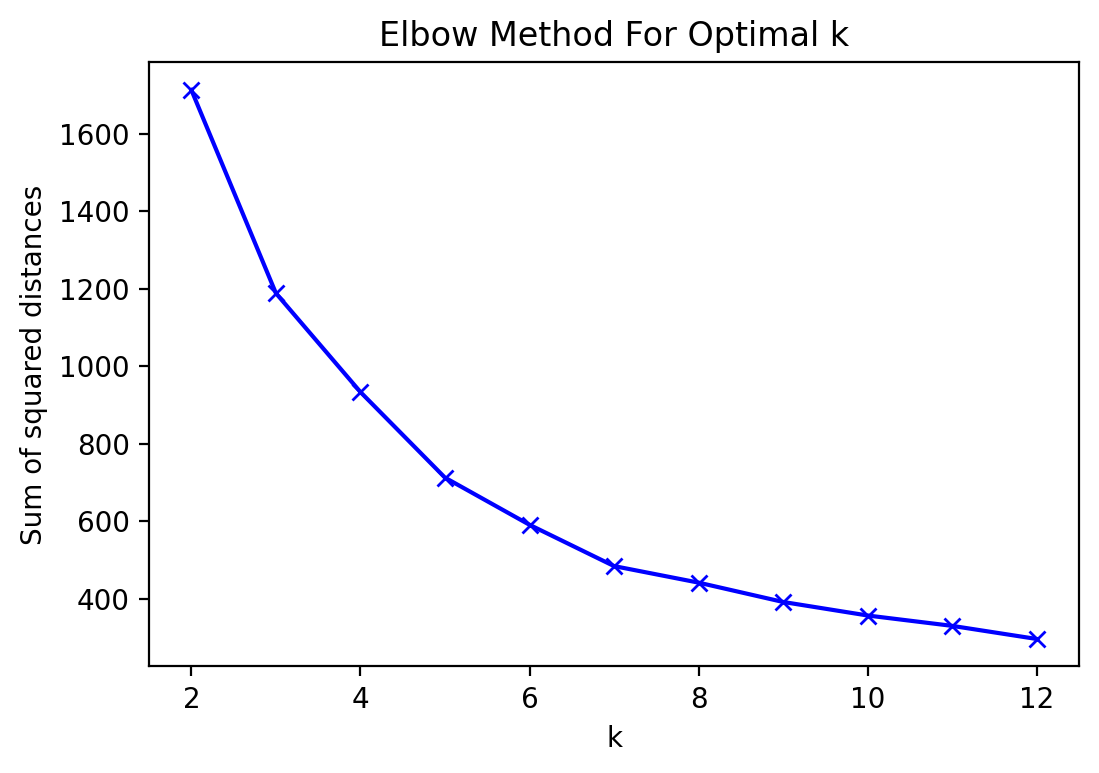

In [39]:
#Creating a function for the elbow curve 
def elbow_plot(min_k, max_k, k_max_iter):
    # Elbow-curve/sum of squared distances
    sum_squared_distances = []
    k_range = range(min_k, max_k+1)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, max_iter=k_max_iter)
        kmeans.fit(players_scaled)

        sum_squared_distances.append(kmeans.inertia_)

    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
#Calling the function    
elbow_plot(2,12, 50)    

For k=2, silhouette score = 0.49720210226109385
For k=3, silhouette score = 0.44104782016965305
For k=4, silhouette score = 0.48001793339706494
For k=5, silhouette score = 0.48274239757826515
For k=6, silhouette score = 0.49128988535988244
For k=7, silhouette score = 0.5389768064997482
For k=8, silhouette score = 0.5383407421256583
For k=9, silhouette score = 0.5386890750851024
For k=10, silhouette score = 0.5267307834183552
For k=11, silhouette score = 0.5268630837066157
For k=12, silhouette score = 0.5202220895978255


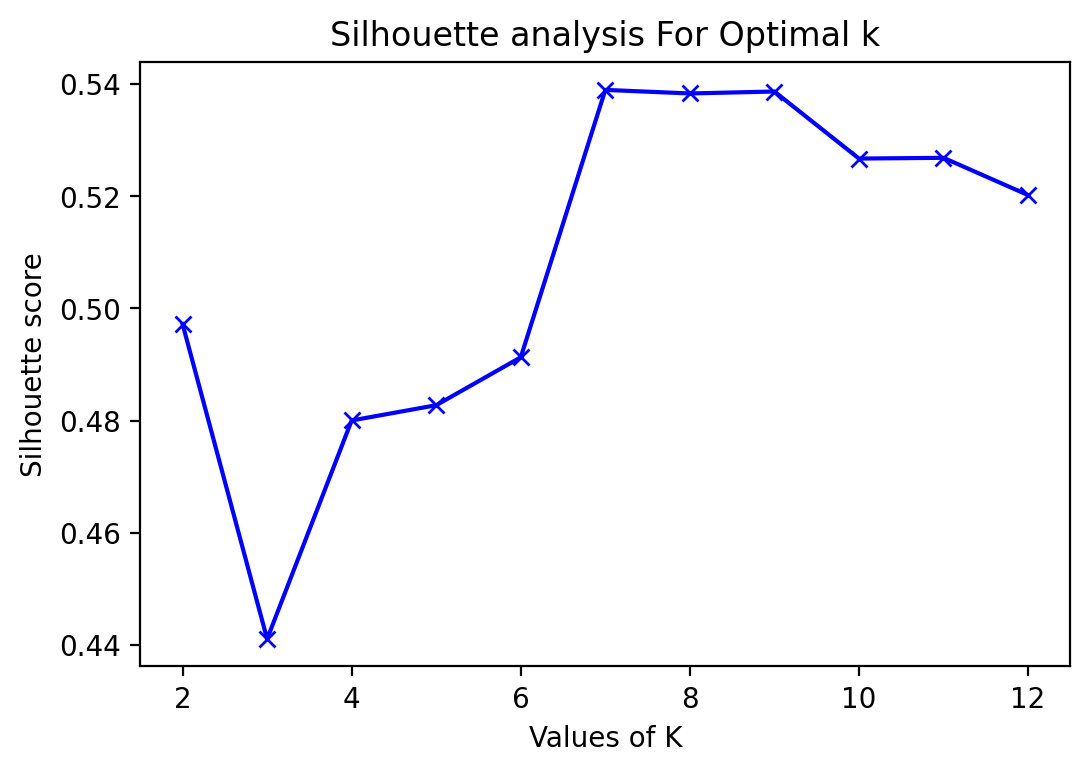

In [40]:
# Method to compute the silhouette score for the given input
silhouette_avg = []
def compute_silhouette_score(input_df, min_k, max_k, k_max_iter):
    # silhouette analysis
    k_range = range(min_k, max_k+1)
    

    for k in k_range :
        # intialise kmeans
        kmeans = KMeans(n_clusters=k, max_iter=k_max_iter)
        kmeans.fit(input_df)
        cluster_labels = kmeans.labels_

        # silhouette score
        silhouette_avg.append(silhouette_score(input_df, cluster_labels))
        silhouette_av = silhouette_score(input_df, cluster_labels)
        print(f"For k={k}, silhouette score = {silhouette_av}")
    plt.plot(k_range,silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    plt.show()

#Calling the function  
compute_silhouette_score(players_scaled, 2,12,300)

In [41]:
#Number of clusters is taken as 5
NUM_CLUSTERS = 5
#Displaying the head of the players dataframe
players.head()

name  Batting_Runs     BF  100   50    4s    6s  Batting_SR  \
2      Abdul Samad         222.0  152.0  0.0  0.0  12.0  14.0  149.170000   
3  Abhinav Manohar         108.0   75.0  0.0  0.0  14.0   3.0  144.000000   
4  Abhishek Sharma         595.0  451.0  0.0  2.0  60.0  20.0  130.186667   
5    Aiden Markram         527.0  393.0  0.0  3.0  37.0  23.0  130.865000   
6   Ajinkya Rahane         246.0  235.0  0.0  1.0  26.0   6.0  104.750000   

   Bowling_Runs  Wkts  Bowling_SR    Econ  Cost IN US $ (000)  
2         105.0   2.0        24.0  11.355               520.0  
3           0.0   0.0         0.0   0.000               338.0  
4         155.0   6.0        22.5   7.750               845.0  
5          64.0   1.0        36.0  10.660               338.0  
6           0.0   0.0         0.0   0.000               130.0

In [42]:
# Initializing few colour codes for each cluster
CLUSTER_COLORS = ['#F28A30','#0ABDA0','#008AC5','#D6618F','#F3CD05','#A882C1','#BDA589','#888C46',
                  '#36688D','#00743F','#0444BF','#A7414A','#1D65A6','red','green','blue','orange','pink','yellow']

In [43]:
# Showing the top few players in each cluster (Players sorted on no. of matches played)
def  groupby_cluster(cluster_col, head_size):
    g = players.groupby([cluster_col]).apply(lambda x: x.sort_values(["Cost IN US $ (000)"], ascending = False)).reset_index(drop=True)
    # select top N rows within each cluster
    display(g.groupby(cluster_col)['name',cluster_col].head(head_size))

In [44]:
#Creating a function for column color style
def print_with_column_color_style(input_df):

    col_bgcolor_dict = dict(zip(input_df.columns,['background-color:'+i for i in CLUSTER_COLORS]))
    def mycolor(x):
        return pd.DataFrame(col_bgcolor_dict,index=x.index,columns=x.columns)

    return input_df.style.apply(mycolor,axis=None)

In [45]:
#Creating a function for row color style
def print_with_row_color_style(input_df, cluster_col):
    clusters = list(input_df[cluster_col].sort_values().unique())
    col_bgcolor_dict = dict(zip(clusters,['background-color:'+i for i in CLUSTER_COLORS]))
    def mycolor(x):
        return [col_bgcolor_dict[x[cluster_col]]]*len(x)
    
    return input_df.style.apply(mycolor,axis=1)

In [46]:
# Get the summary of the clustering based on the labels in the output column specified
def  clustering_summary(cluster_col):
    
    # Create summary table for clusters
    cluster_summary = pd.DataFrame(players[cluster_col].value_counts().sort_index())
    cluster_summary.columns = ['Num_Players']
    cluster_summary.insert(0, 'Cluster', cluster_summary.index)
    
    # Plot pie-chart
    fig = plt.figure(figsize=(15,6))

    ax1 = fig.add_subplot(121)
    cluster_summary['Num_Players'].plot.pie(autopct="%1.1f%%",  colors = CLUSTER_COLORS)
    
    print("\n-----------------------\nPLAYERS CLUSTER SUMMARY\n-----------------------\n")
    
    # Plot summary table

    #display(cluster_summary)
    ax2 = fig.add_subplot(122)
    font_size=14
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    
    # Set the row colours to match the cluster index
    colors = []
    num_columns = len(cluster_summary.columns)
    num_rows = len(cluster_summary.index)
    for i in range(num_rows):
        colors.append([CLUSTER_COLORS[i]] * num_columns)

    summary_plot_table = ax2.table(cellText=cluster_summary.values,cellColours=colors,
                         colLabels=cluster_summary.columns,bbox=bbox,loc='center',cellLoc='center' )

    summary_plot_table.auto_set_font_size(False)
    summary_plot_table.set_fontsize(font_size)

    plt.show()



In [47]:
# Getting the summary of the clustering based on the labels in the output column specified
def  clustering_data(cluster_col):
    

    # Sort players data based on no. of innings played
    # Create column for each cluster and insert players in that cluster
    grouper = players.sort_values(["Cost IN US $ (000)"], ascending = False)[['name',cluster_col]].groupby([cluster_col])
    cluster_df = pd.concat([pd.Series(v['name'].tolist(), name=k) for k, v in grouper], axis=1)
    cluster_df.fillna('',inplace=True)
    print("\n-----------------------\nPLAYERS IN EACH CLUSTER\n-----------------------\n")
    display(print_with_column_color_style(cluster_df))


In [48]:
# Getting the summary of the clustering based on the labels in the output column specified
def  cluster_all_stats(cluster_col): 
    display(print_with_row_color_style(players[CLUSTER_COLS+[cluster_col]],cluster_col))
    

In [49]:
# Define function to perform the kmeans clustering on the given data
def kmeans_clustering(num_clusters, max_iterations,input_df,output_df, output_col):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=max_iterations)
    kmeans.fit(input_df)
    # assign the label to the output column
    output_df[output_col] = kmeans.labels_ 

In [50]:
#Displaying the scaled players dataframe
players_scaled

Batting_Runs        BF       100        50        4s        6s  \
0        0.019606 -0.026438 -0.150256 -0.459809 -0.189901  0.306289   
1       -0.279167 -0.296577 -0.150256 -0.459809 -0.133678 -0.388055   
2        0.997174  1.022542 -0.150256  0.315812  1.159453  0.685022   
3        0.818958  0.819061 -0.150256  0.703622  0.512887  0.874389   
4        0.082506  0.264750 -0.150256 -0.071999  0.203660 -0.198688   
..            ...       ...       ...       ...       ...       ...   
232     -0.562216 -0.559699 -0.150256 -0.459809 -0.527240 -0.577421   
233     -0.562216 -0.559699 -0.150256 -0.459809 -0.527240 -0.577421   
234     -0.562216 -0.559699 -0.150256 -0.459809 -0.527240 -0.577421   
235     -0.562216 -0.559699 -0.150256 -0.459809 -0.527240 -0.577421   
236     -0.562216 -0.559699 -0.150256 -0.459809 -0.527240 -0.577421   

     Batting_SR  Bowling_Runs      Wkts  Bowling_SR      Econ  \
0      1.421908     -0.328904 -0.429918    0.828563  1.715760   
1      1.344942     -0.630624 -0.572622   -0.829327 -0.928150   
2      1.139302     -0.185227 -0.144510    0.724945  0.876368   
3      1.149400     -0.446718 -0.501270    1.657508  1.553935   
4      0.760625     -0.630624 -0.572622   -0.829327 -0.928150   
..          ...           ...       ...         ...       ...   
232   -0.798796     -0.630624 -0.572622   -0.829327 -0.928150   
233   -0.798796     -0.630624 -0.572622   -0.829327 -0.928150   
234   -0.798796     -0.630624 -0.572622   -0.829327 -0.928150   
235   -0.798796     -0.630624 -0.572622   -0.829327 -0.928150   
236   -0.798796     -0.630624 -0.572622   -0.829327 -0.928150   

     Cost IN US $ (000)  
0              0.071934  
1             -0.259102  
2              0.663071  
3             -0.259102  
4             -0.637430  
..                  ...  
232           -0.826593  
233           -0.306393  
234           -0.755657  
235           -0.826593  
236           -0.826593  

[237 rows x 12 columns]

In [51]:
# Created a function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [52]:
# call the function
H=hopkins_statistic(players_scaled)
print(H)

0.901983187838077


Since multiple calls of the function will result in different values of H, we call the function and compute Hopkins' Statistic multiple times, and take its average.

In [53]:
#list to hold values for each call
l = [] 
#Looping to find the hopkins's statistic for the dataframe
for i in range(20):
    H=hopkins_statistic(players_scaled)
    l.append(H)
#print average value:
np.mean(l)

0.9124091714014412

In [54]:
# New output column to create for the cluster label
kmeans_label = 'cluster_kmeans'

# K-means clustering
kmeans_clustering(5,50,players_scaled,players,kmeans_label)

# View few entries from each cluster
groupby_cluster(kmeans_label,3)


C:\Users\jagan\AppData\Local\Temp/ipykernel_9864/4118254311.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(g.groupby(cluster_col)['name',cluster_col].head(head_size))


name  cluster_kmeans
0    Romario Shepherd               0
1      Mitchell Marsh               0
2         Odean Smith               0
68       Rishabh Pant               1
69       Rohit Sharma               1
70       Ishan Kishan               1
107     Shahrukh Khan               2
108         Tim David               2
109         Mark Wood               2
200         K L Rahul               3
201       Jos Buttler               3
202    Shikhar Dhawan               3
203   Ravindra Jadeja               4
204       Rashid Khan               4
205     Deepak Chahar               4


-----------------------
PLAYERS CLUSTER SUMMARY
-----------------------



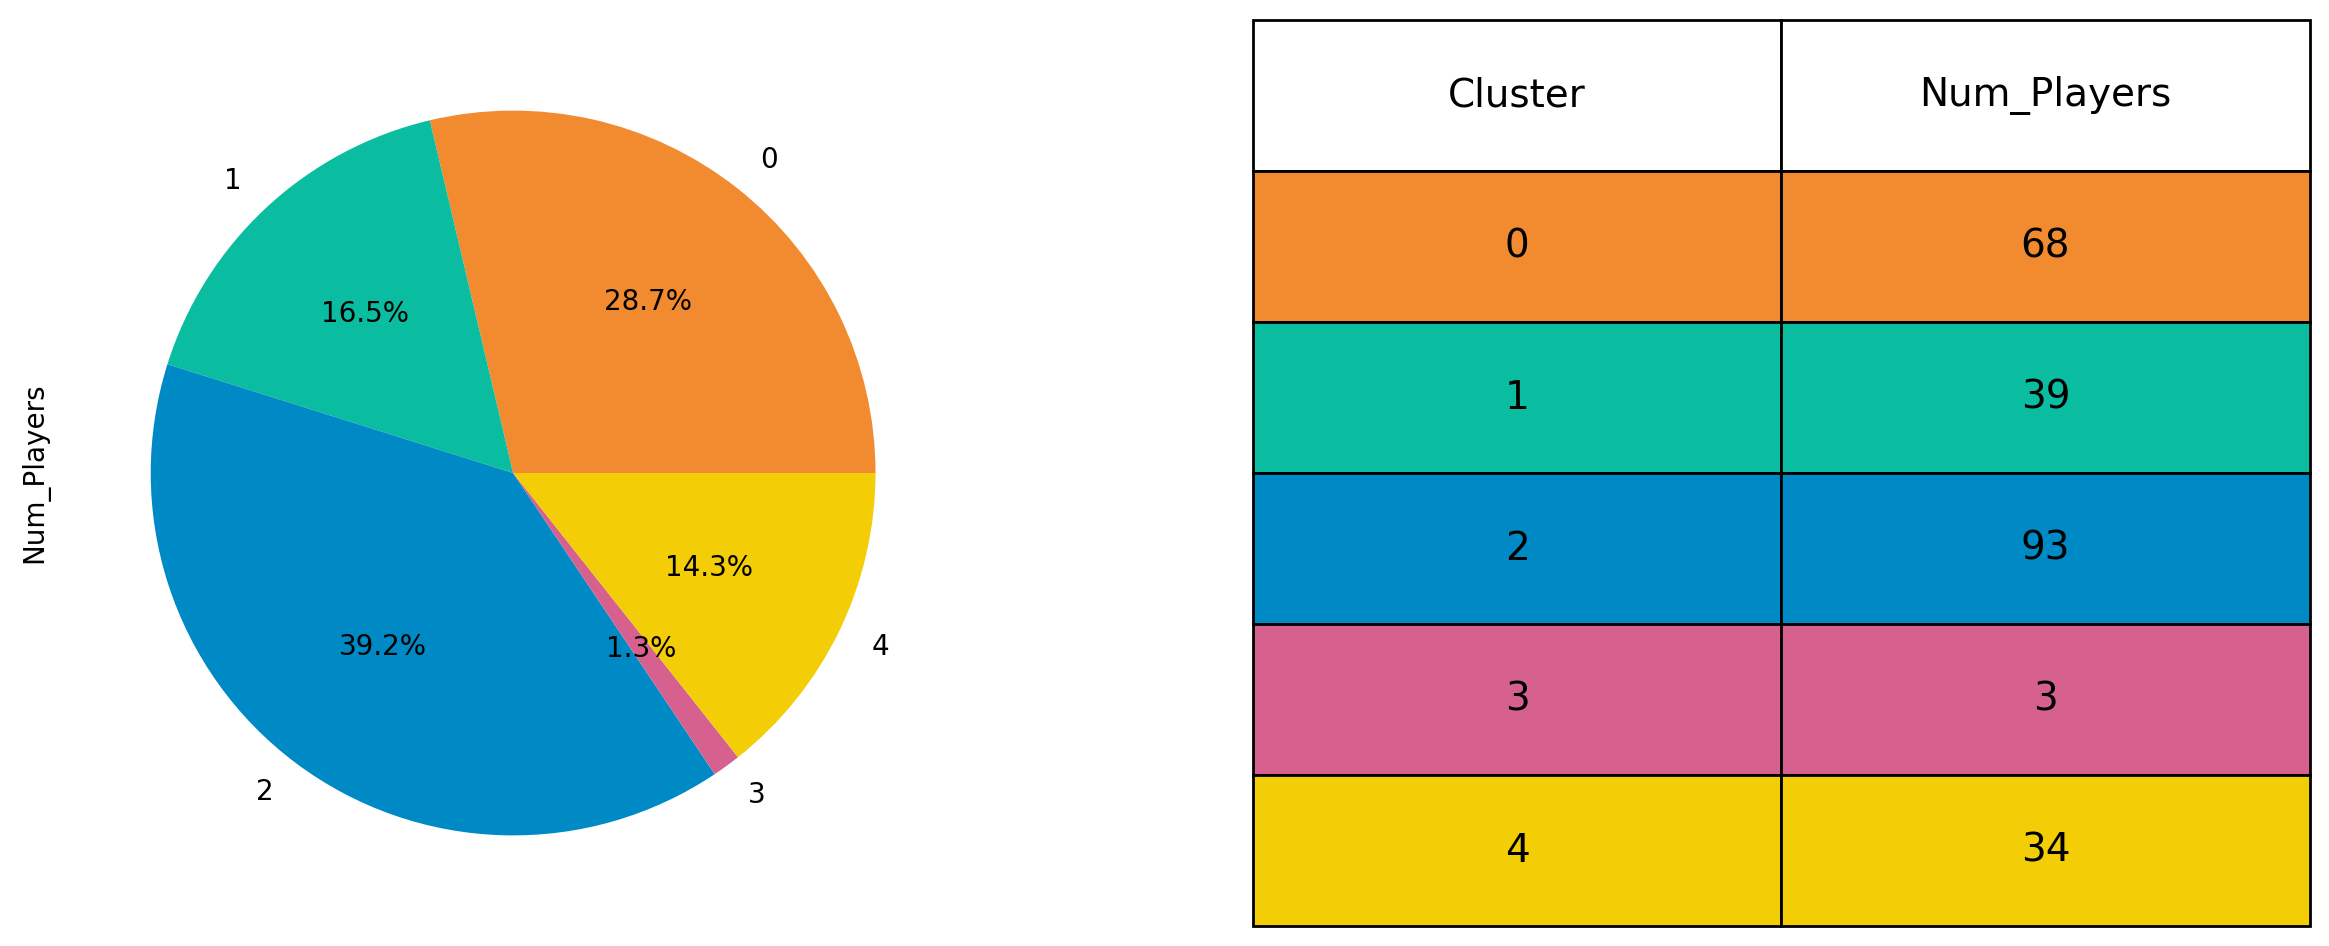

In [55]:
# View the summary of the clustering
clustering_summary(kmeans_label)

In [56]:
#Displaying the Clustering data 
clustering_data(kmeans_label)


-----------------------
PLAYERS IN EACH CLUSTER
-----------------------



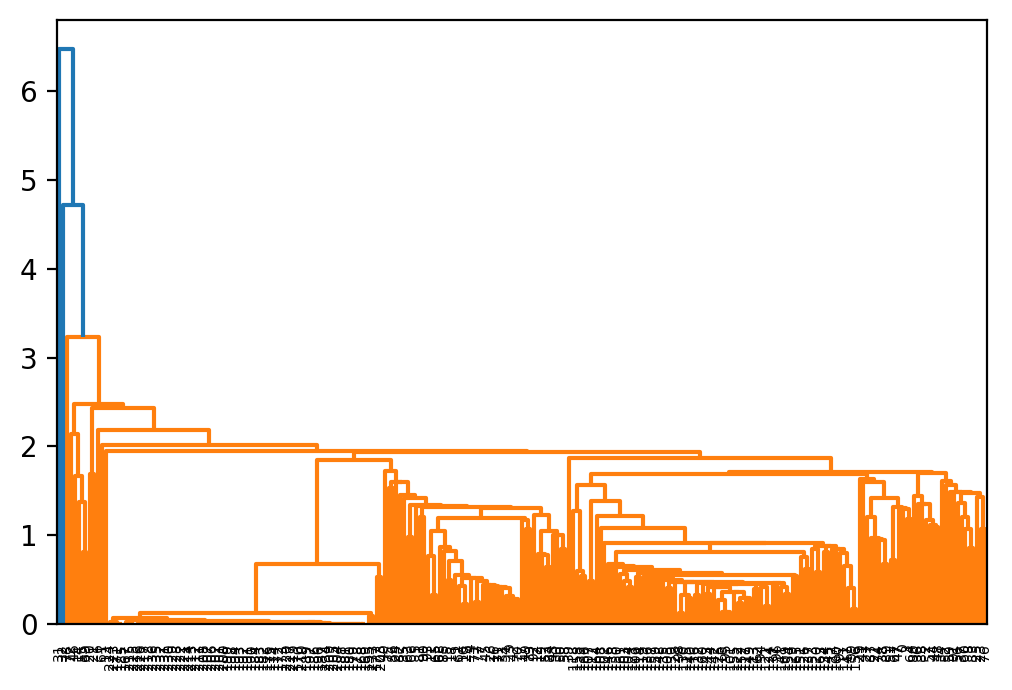

In [57]:
# single linkage
mergings = linkage(players_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

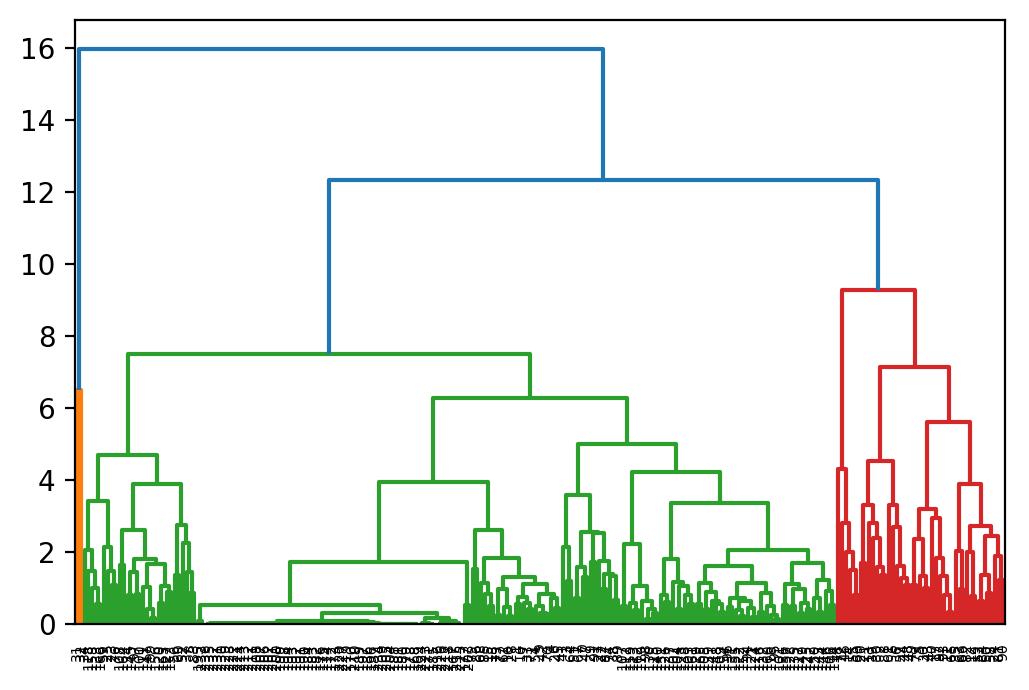

In [58]:
# complete linkage
mergings = linkage(players_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

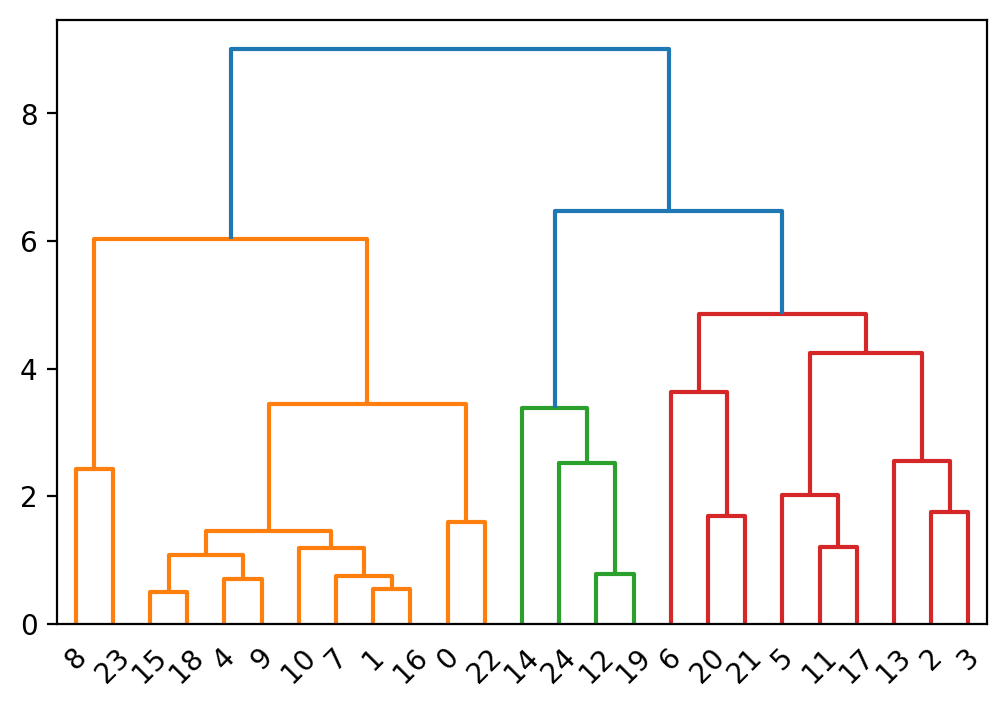

In [59]:
# complete linkage for 25 players
mergings = linkage(players_scaled[0:25], method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [60]:
# Perform hierarchical clustering based on the input parameters
def hierarchical_clustering(linkage_method, linkage_metric, num_clusters,input_df,output_df,output_col):
    mergings = linkage(input_df, method=linkage_method, metric=linkage_metric)
    cluster_labels = cut_tree(mergings, n_clusters=num_clusters).reshape(-1, )
    # assign cluster labels
    output_df[output_col] = cluster_labels
    return mergings

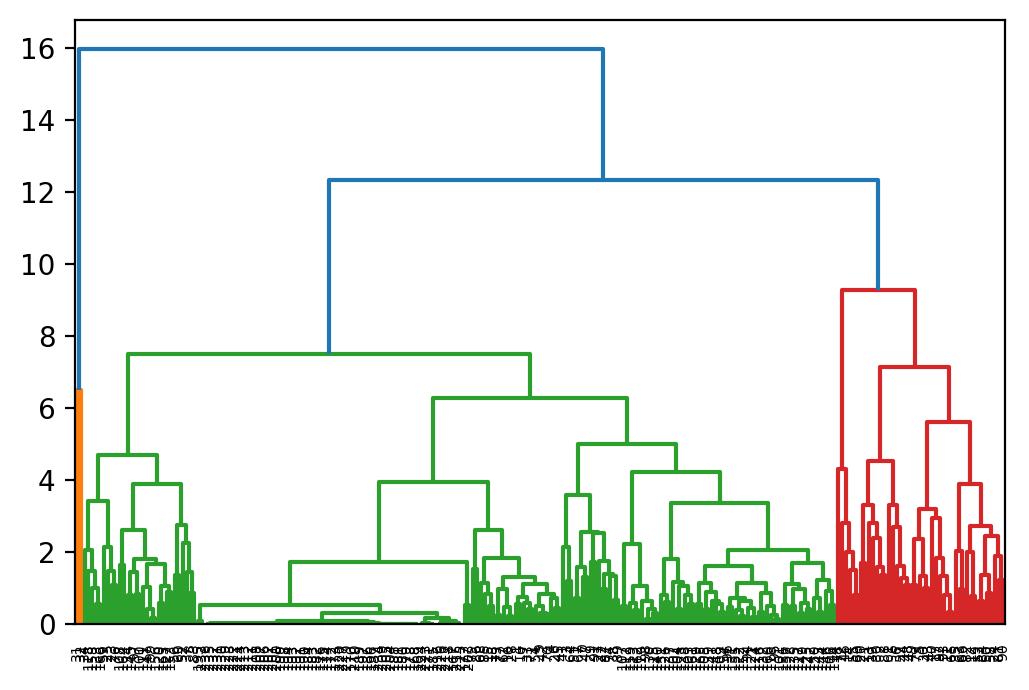

C:\Users\jagan\AppData\Local\Temp/ipykernel_9864/4118254311.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(g.groupby(cluster_col)['name',cluster_col].head(head_size))


name  cluster_hier
0        Shahrukh Khan             0
1    Washington Sundar             0
2            Tim David             0
163       Rishabh Pant             1
164    Ravindra Jadeja             1
165       Rohit Sharma             1
200        Rashid Khan             2
201      Deepak Chahar             2
202     Jasprit Bumrah             2
229       Sanju Samson             3
230     Mayank Agarwal             3
231     Shikhar Dhawan             3
235          K L Rahul             4
236        Jos Buttler             4

In [61]:
# New output column to create for the cluster label
hier_label = 'cluster_hier'


mergings = hierarchical_clustering(linkage_method = "complete", linkage_metric = "euclidean", num_clusters = NUM_CLUSTERS, input_df = players_scaled, output_df = players, output_col = "cluster_hier")
 
# Plot the dendogram
dendrogram(mergings)
plt.show()

# View few entries from each cluster
groupby_cluster(hier_label,3)


-----------------------
PLAYERS CLUSTER SUMMARY
-----------------------



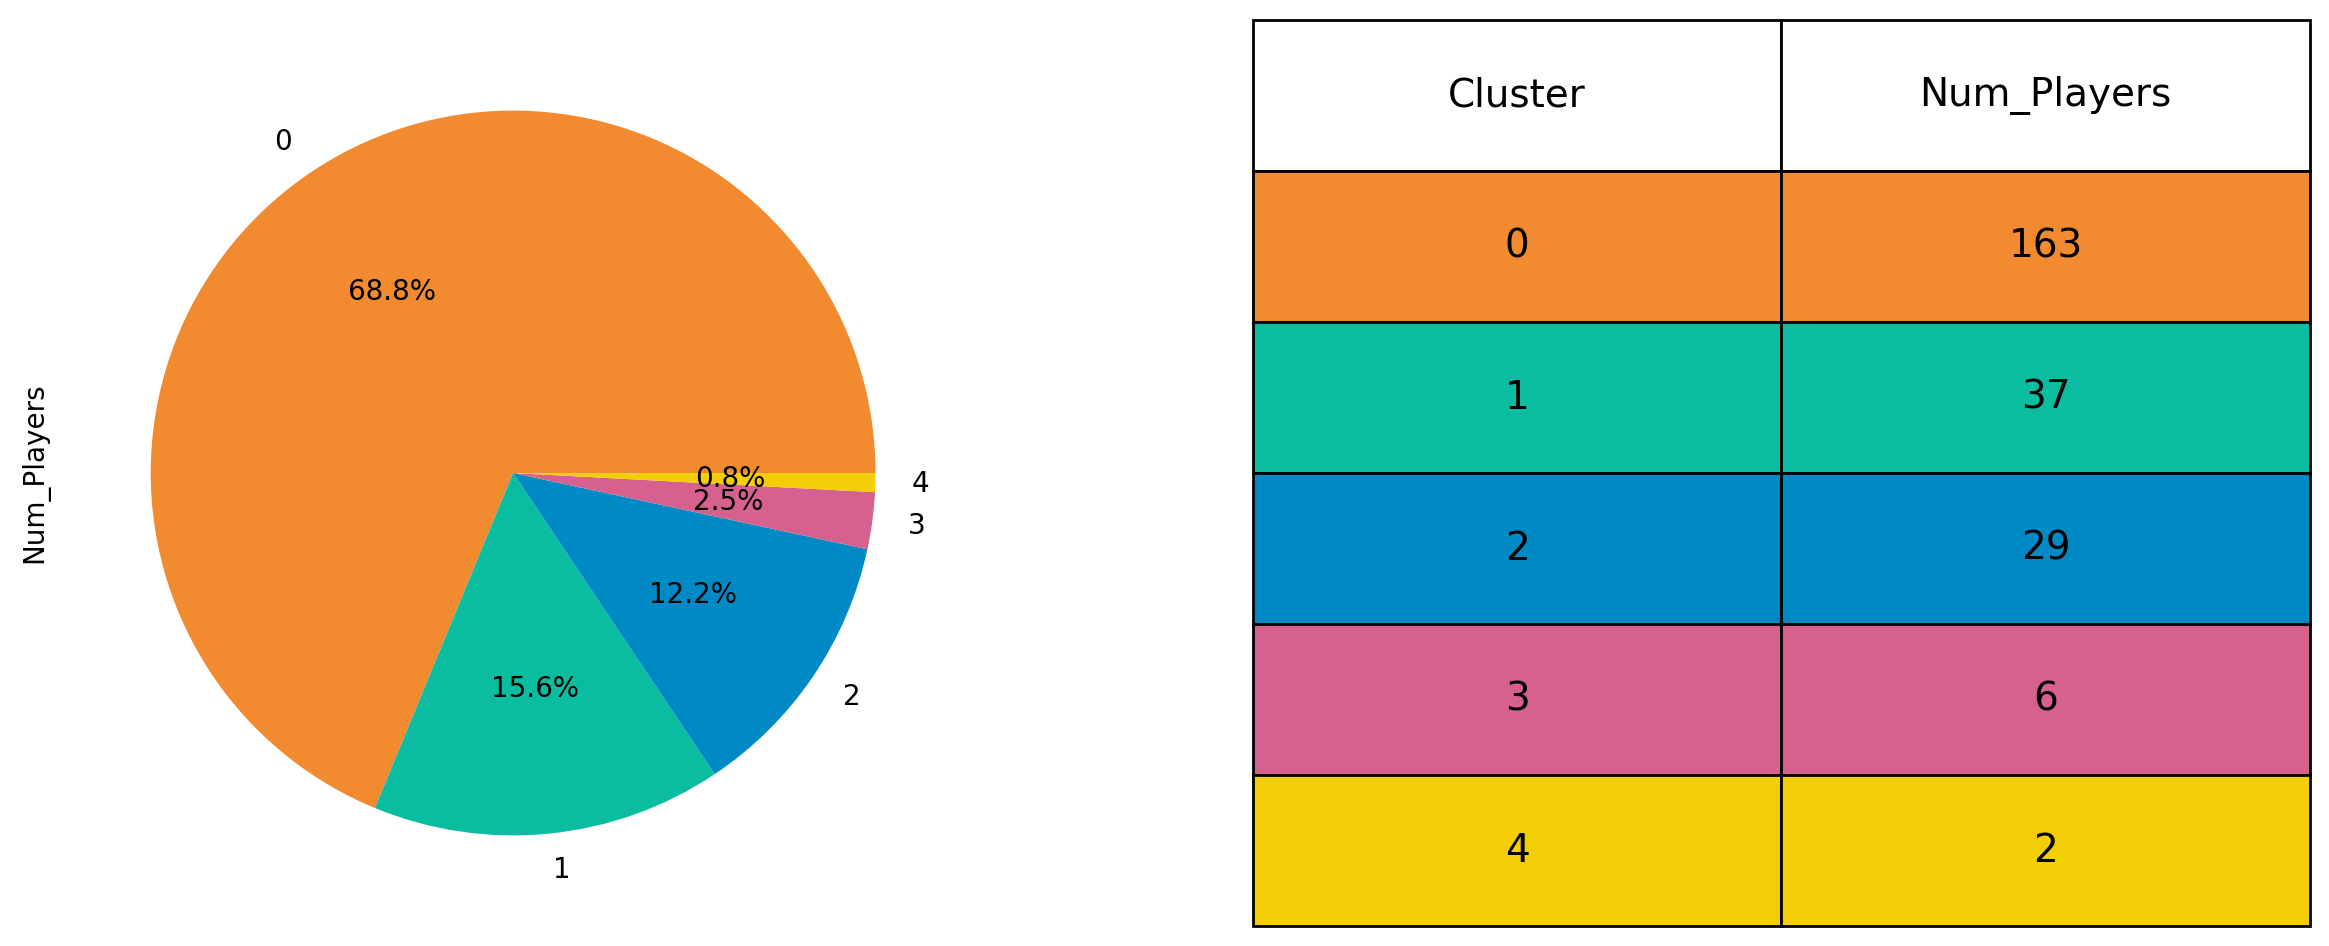

In [62]:
# View the summary of the clustering
clustering_summary(hier_label)

In [63]:
#Displaying the Clustering data 
clustering_data(hier_label)


-----------------------
PLAYERS IN EACH CLUSTER
-----------------------



Estimated number of clusters: 4
Estimated number of noise points: 88

-----------------------
PLAYERS CLUSTER SUMMARY
-----------------------



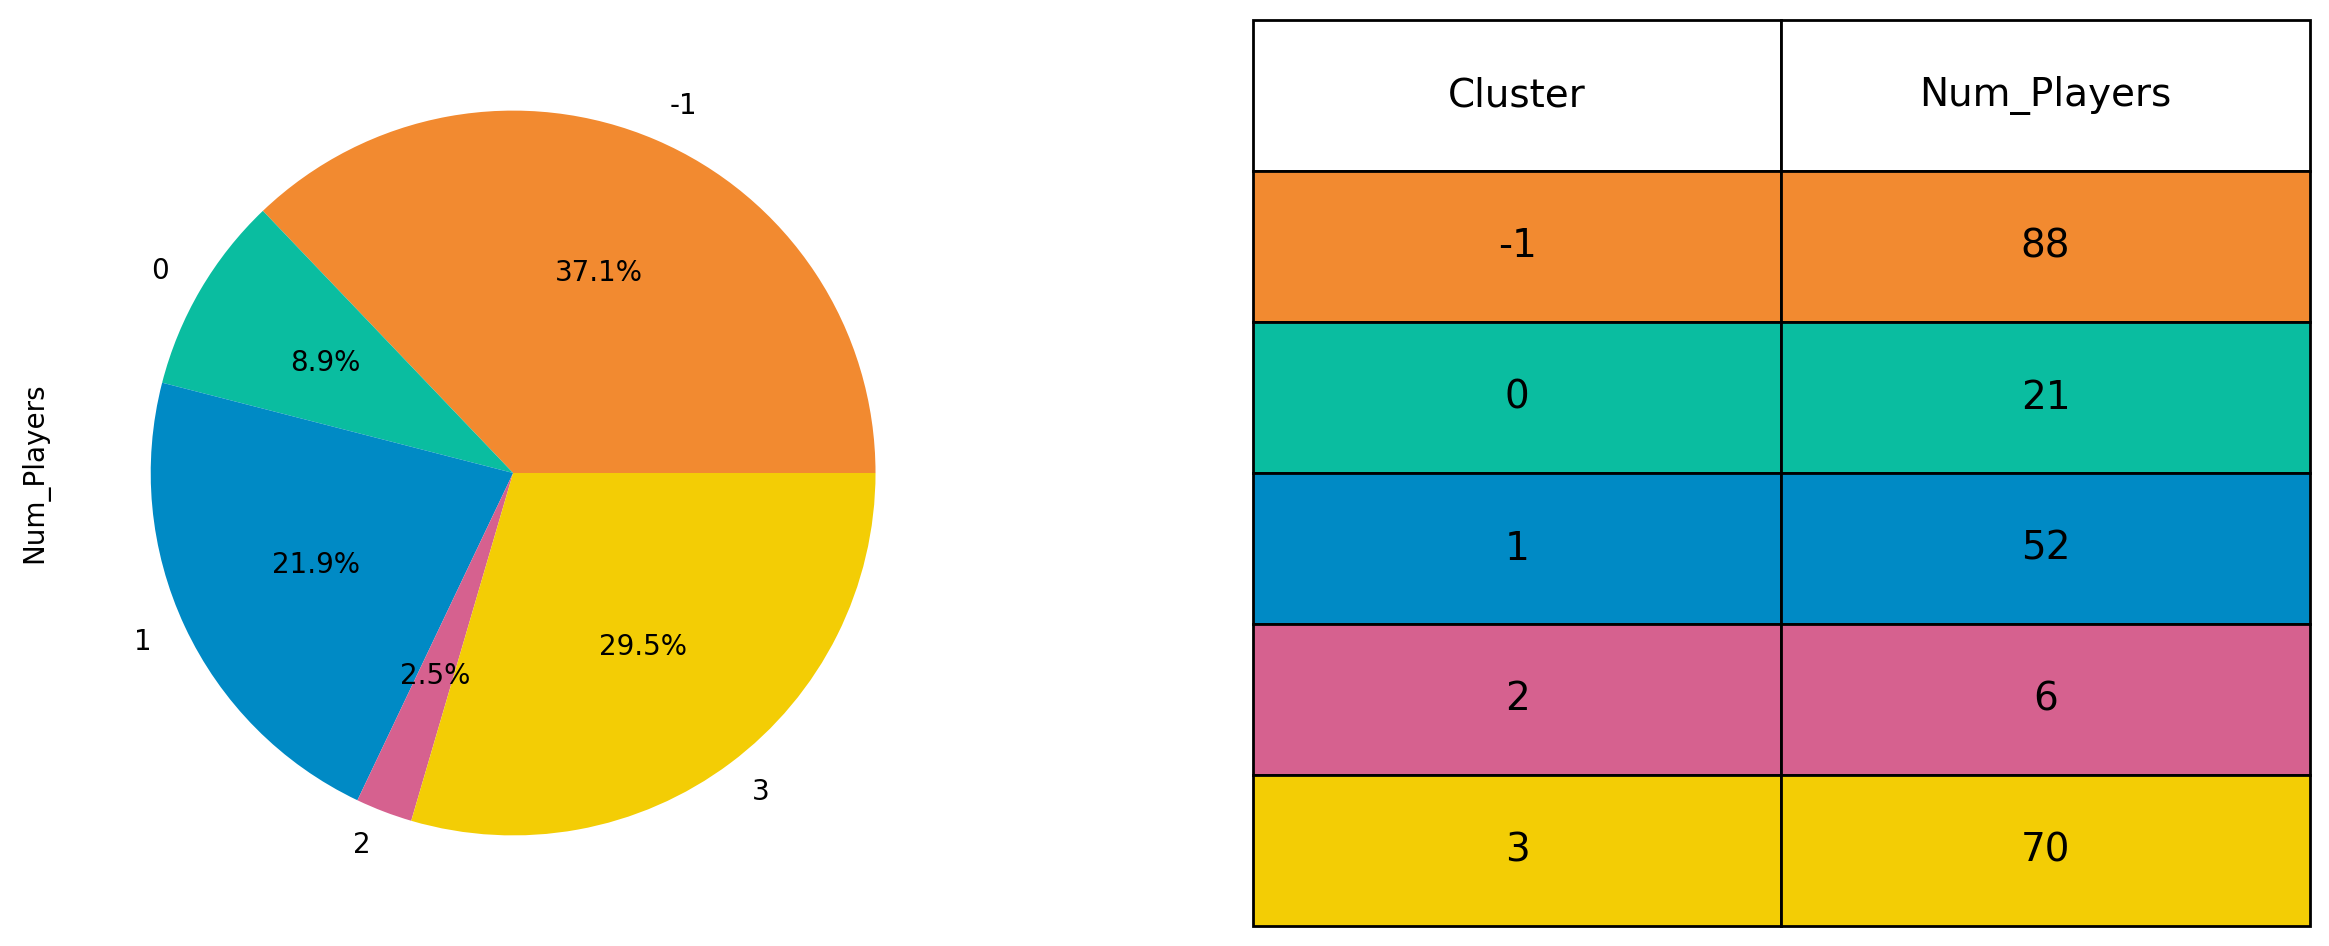

In [64]:
# Perform density clustering based on the input parameters
db = DBSCAN(eps=0.9, min_samples=5).fit(players_scaled)

# Assign cluster labels
players["cluster_dbscan"] = db.labels_

# Number of clusters in labels, ignoring noise if present.
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

clustering_summary("cluster_dbscan")

In [65]:
# Perform density clustering based on the input parameters
def dbscan_clustering(epsilon, minimum_samples,input_df,output_df,output_col):
    # Compute DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit(input_df)
    labels = db.labels_

    # assign cluster labels
    output_df[output_col] = labels
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)



In [66]:
# New output column to create for the cluster label
dbscan_label = 'cluster_dbscan'

# DBSCAN clustering
dbscan_clustering(0.9,3,players_scaled,players,dbscan_label)

# View few entries from each cluster
groupby_cluster(dbscan_label,3)

C:\Users\jagan\AppData\Local\Temp/ipykernel_9864/4118254311.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(g.groupby(cluster_col)['name',cluster_col].head(head_size))


name  cluster_dbscan
0           K L Rahul              -1
1        Rishabh Pant              -1
2        Rohit Sharma              -1
72         Anuj Rawat               0
73      Dewald Brevis               0
74      Rovman Powell               0
93   Yashasvi Jaiswal               1
94       David Miller               1
95      Robin Uthappa               1
96   Suryakumar Yadav               2
97       Prithvi Shaw               2
98     Faf du Plessis               2
100   Chetan Sakariya               3
101      Marco Jansen               3
102      Kartik Tyagi               3
152        Avesh Khan               4
153   Lockie Ferguson               4
154   Prasidh Krishna               4
164       Trent Boult               5
165  Yuzvendra Chahal               5
166    Mohammad Shami               5
167         Mark Wood               6
168     Khaleel Ahmed               6
169       Sean Abbott               6


-----------------------
PLAYERS CLUSTER SUMMARY
-----------------------



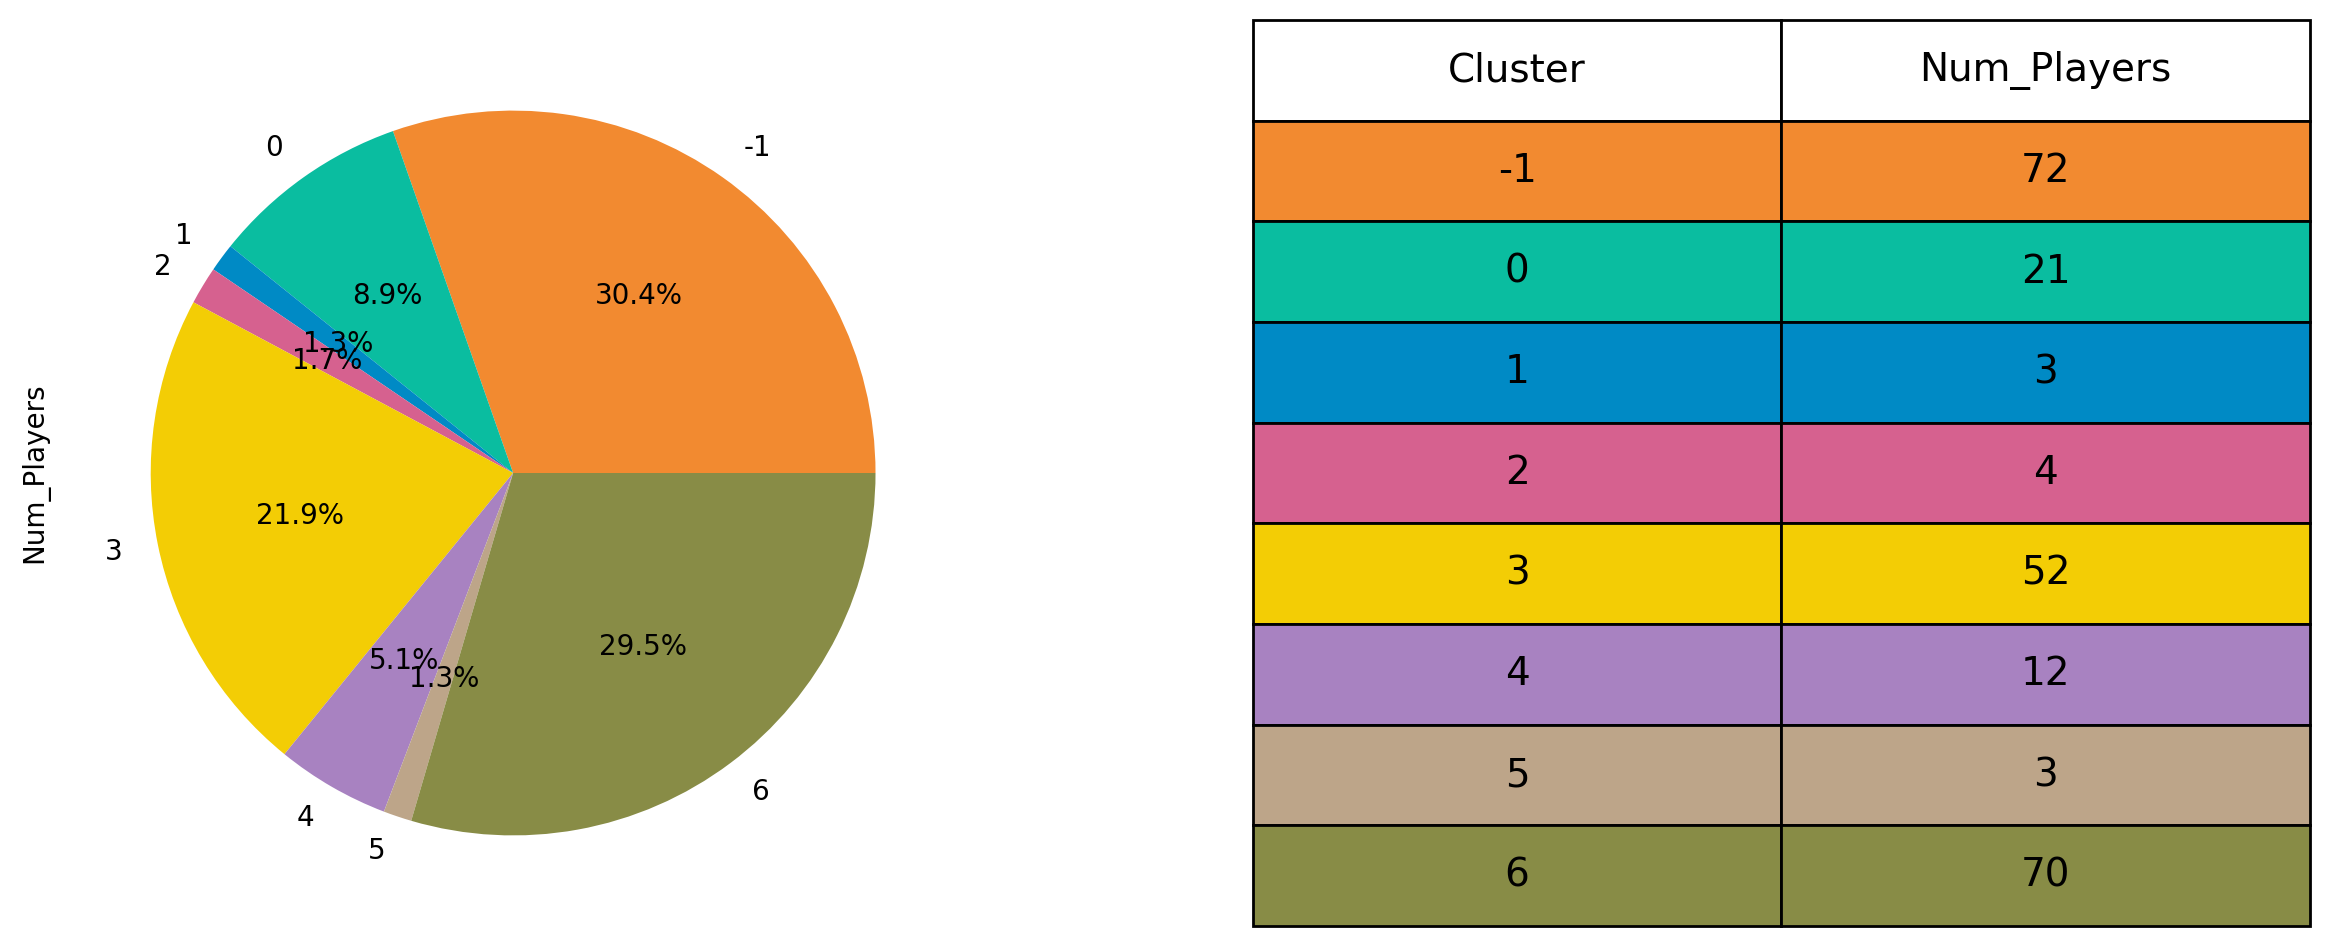

In [67]:
# View the summary of the clustering
clustering_summary(dbscan_label)

In [68]:
#Displaying the Clustering data 
clustering_data(dbscan_label)


-----------------------
PLAYERS IN EACH CLUSTER
-----------------------



In [69]:
#Number of players in each cluster
print(f"K-means clustering with k={NUM_CLUSTERS}")
display(players['cluster_kmeans'].value_counts())
print(f"\nHierarchical clustering with k={NUM_CLUSTERS}")
display(players['cluster_hier'].value_counts())
print(f"\nDBSCAN clustering")
display(players['cluster_dbscan'].value_counts())

K-means clustering with k=5


2    93
0    68
1    39
4    34
3     3
Name: cluster_kmeans, dtype: int64


Hierarchical clustering with k=5


0    163
1     37
2     29
3      6
4      2
Name: cluster_hier, dtype: int64


DBSCAN clustering


-1    72
 6    70
 3    52
 0    21
 4    12
 2     4
 1     3
 5     3
Name: cluster_dbscan, dtype: int64

In [70]:
# Plotly scatter plot
def plot_clusters(x,y,cluster_col,size):
    color_dict = dict(zip(players[cluster_col].sort_values().unique(),CLUSTER_COLORS))
    fig = px.scatter(players, x=x,   y=y, color=cluster_col,
                     size=size, hover_data=['name'], title = f'Scatter Plot: {x} vs {y}, Size = {size}', color_discrete_map=color_dict)
    fig.show()

In [71]:
#Plotting the Plotly scatter plot for K means
plot_clusters('Batting_Runs','Wkts','cluster_kmeans','Cost IN US $ (000)')

In [72]:
#Plotting the Plotly scatter plot
plot_clusters('Batting_Runs','Wkts','cluster_hier','Cost IN US $ (000)')

<AxesSubplot:xlabel='Batting_Runs', ylabel='Wkts'>

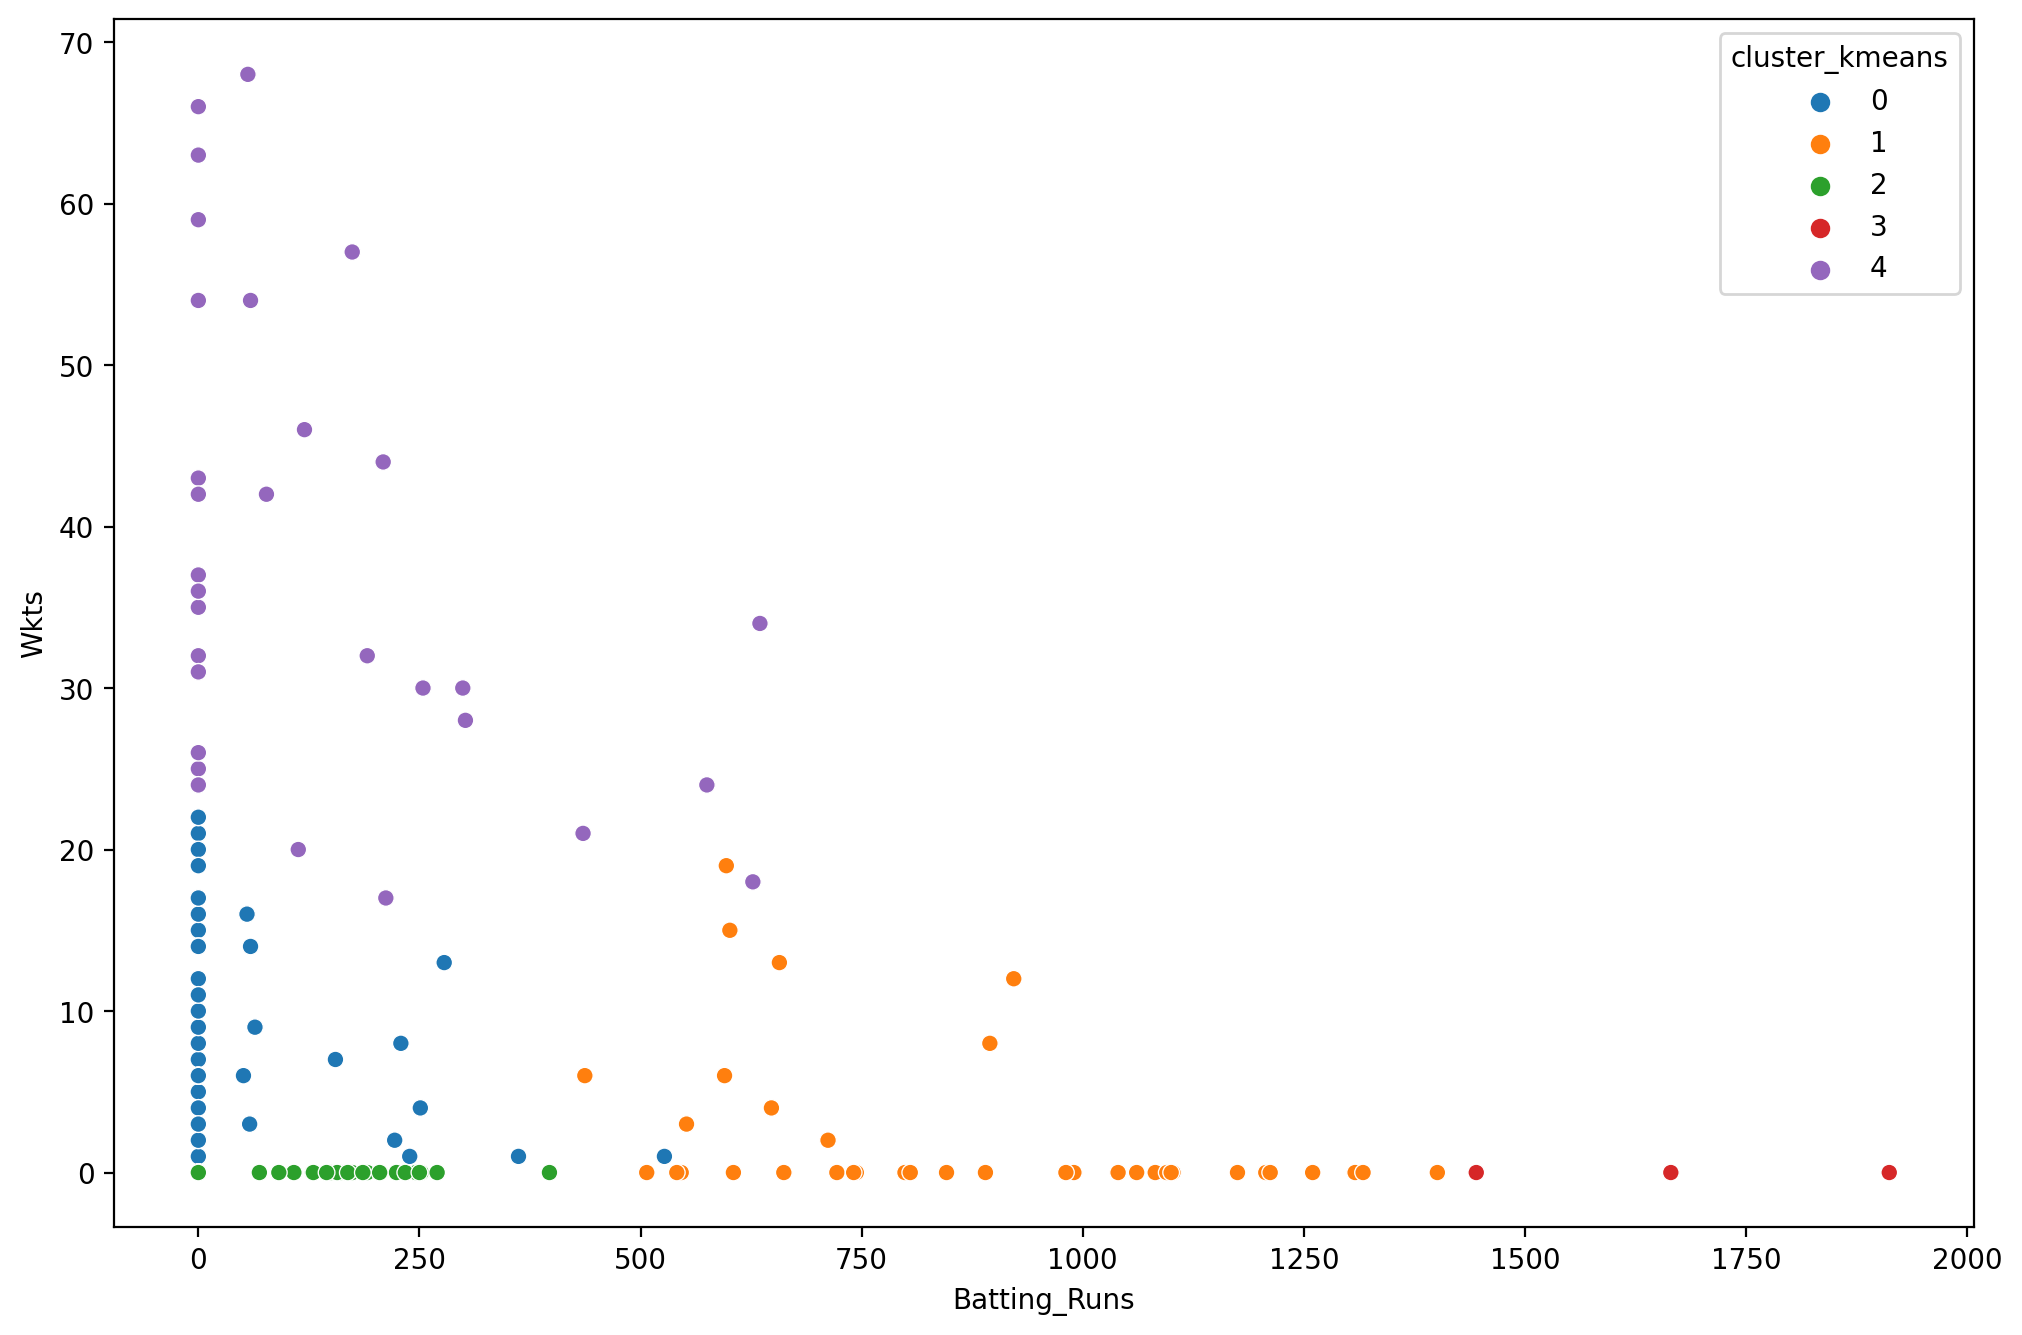

In [73]:
#Plotting the scatter plot for K means
plt.figure(figsize=(12,8))

sns.scatterplot(x="Batting_Runs",   y="Wkts", hue="cluster_kmeans", data=players, palette="tab10")

<AxesSubplot:xlabel='Batting_Runs', ylabel='Wkts'>

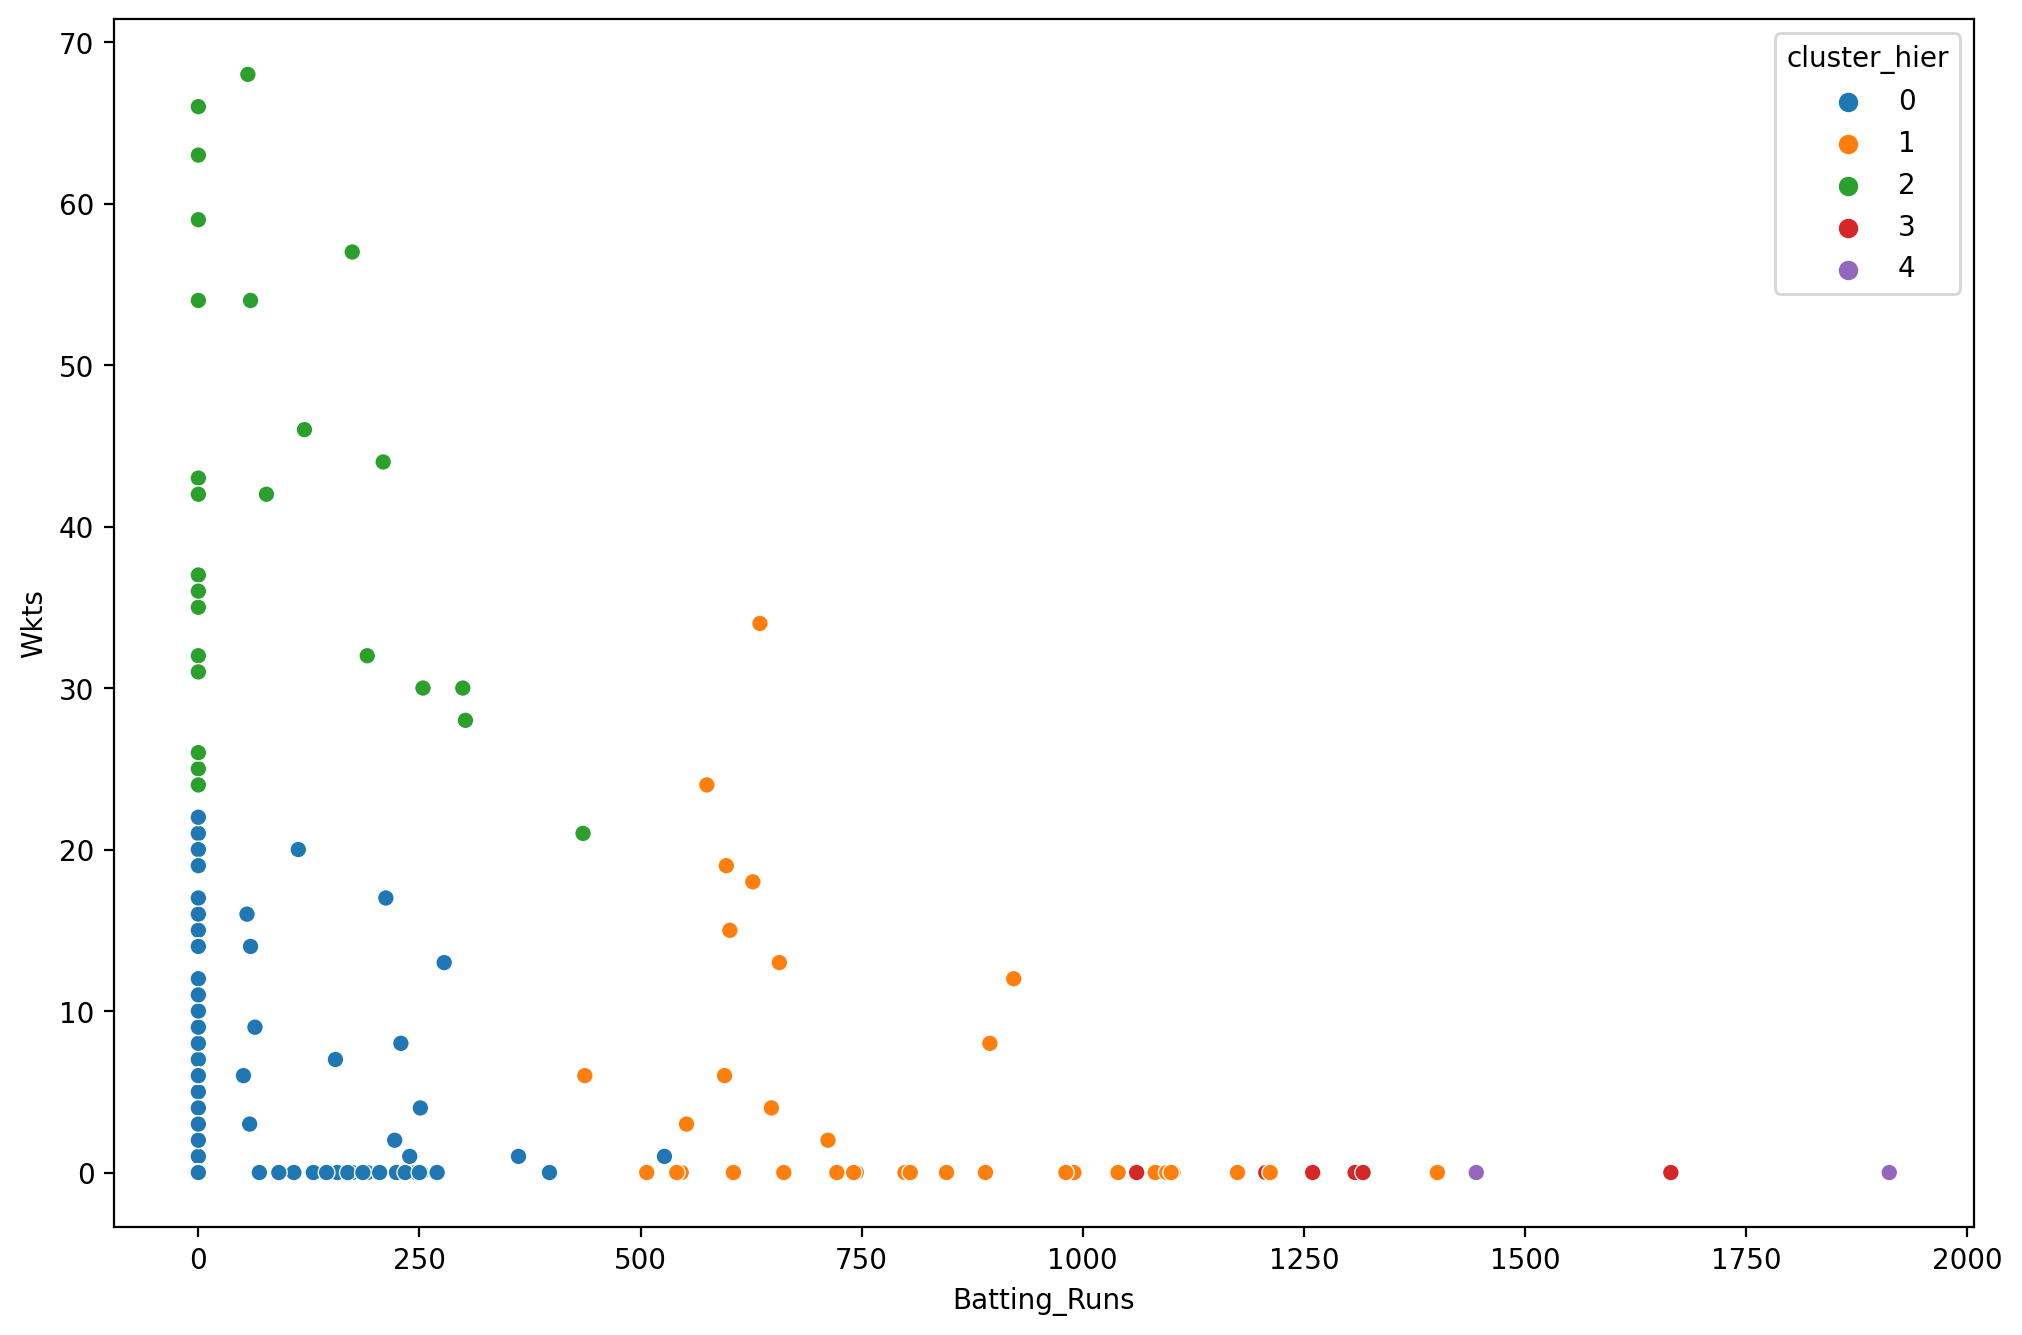

In [74]:
#Plotting the scatter plot for Hierarchical clustering
plt.figure(figsize=(12,8))

sns.scatterplot(x="Batting_Runs",   y="Wkts", hue="cluster_hier", data=players, palette="tab10")

<AxesSubplot:xlabel='Batting_Runs', ylabel='Wkts'>

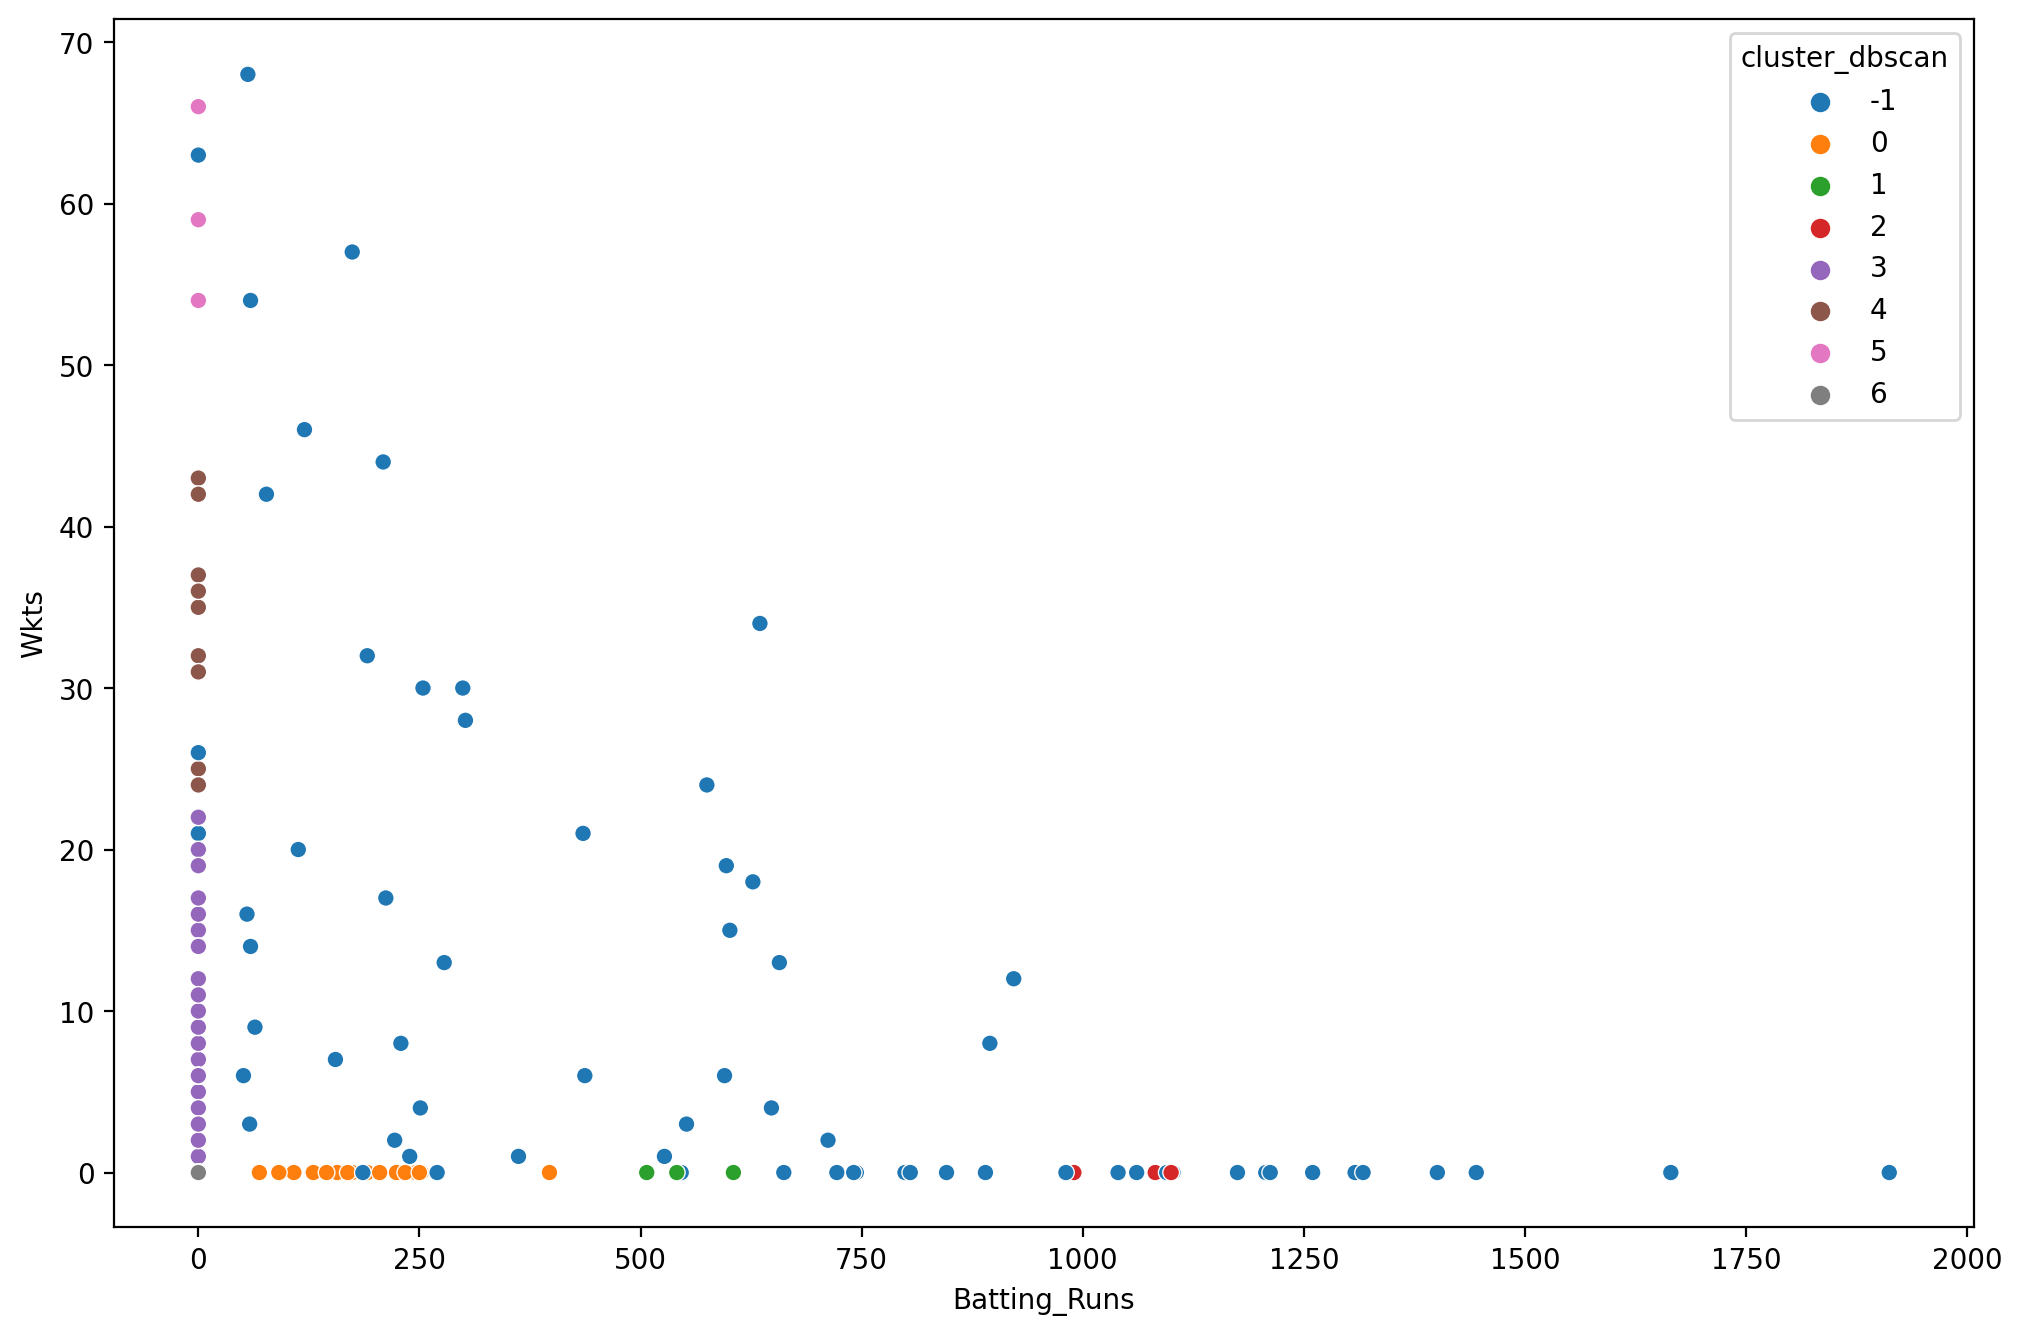

In [75]:
#Plotting the scatter plot for DBSCAN clustering
plt.figure(figsize=(12,8))

sns.scatterplot(x="Batting_Runs",   y="Wkts", hue="cluster_dbscan", data=players, palette="tab10")

<AxesSubplot:xlabel='Batting_Runs', ylabel='Cost IN US $ (000)'>

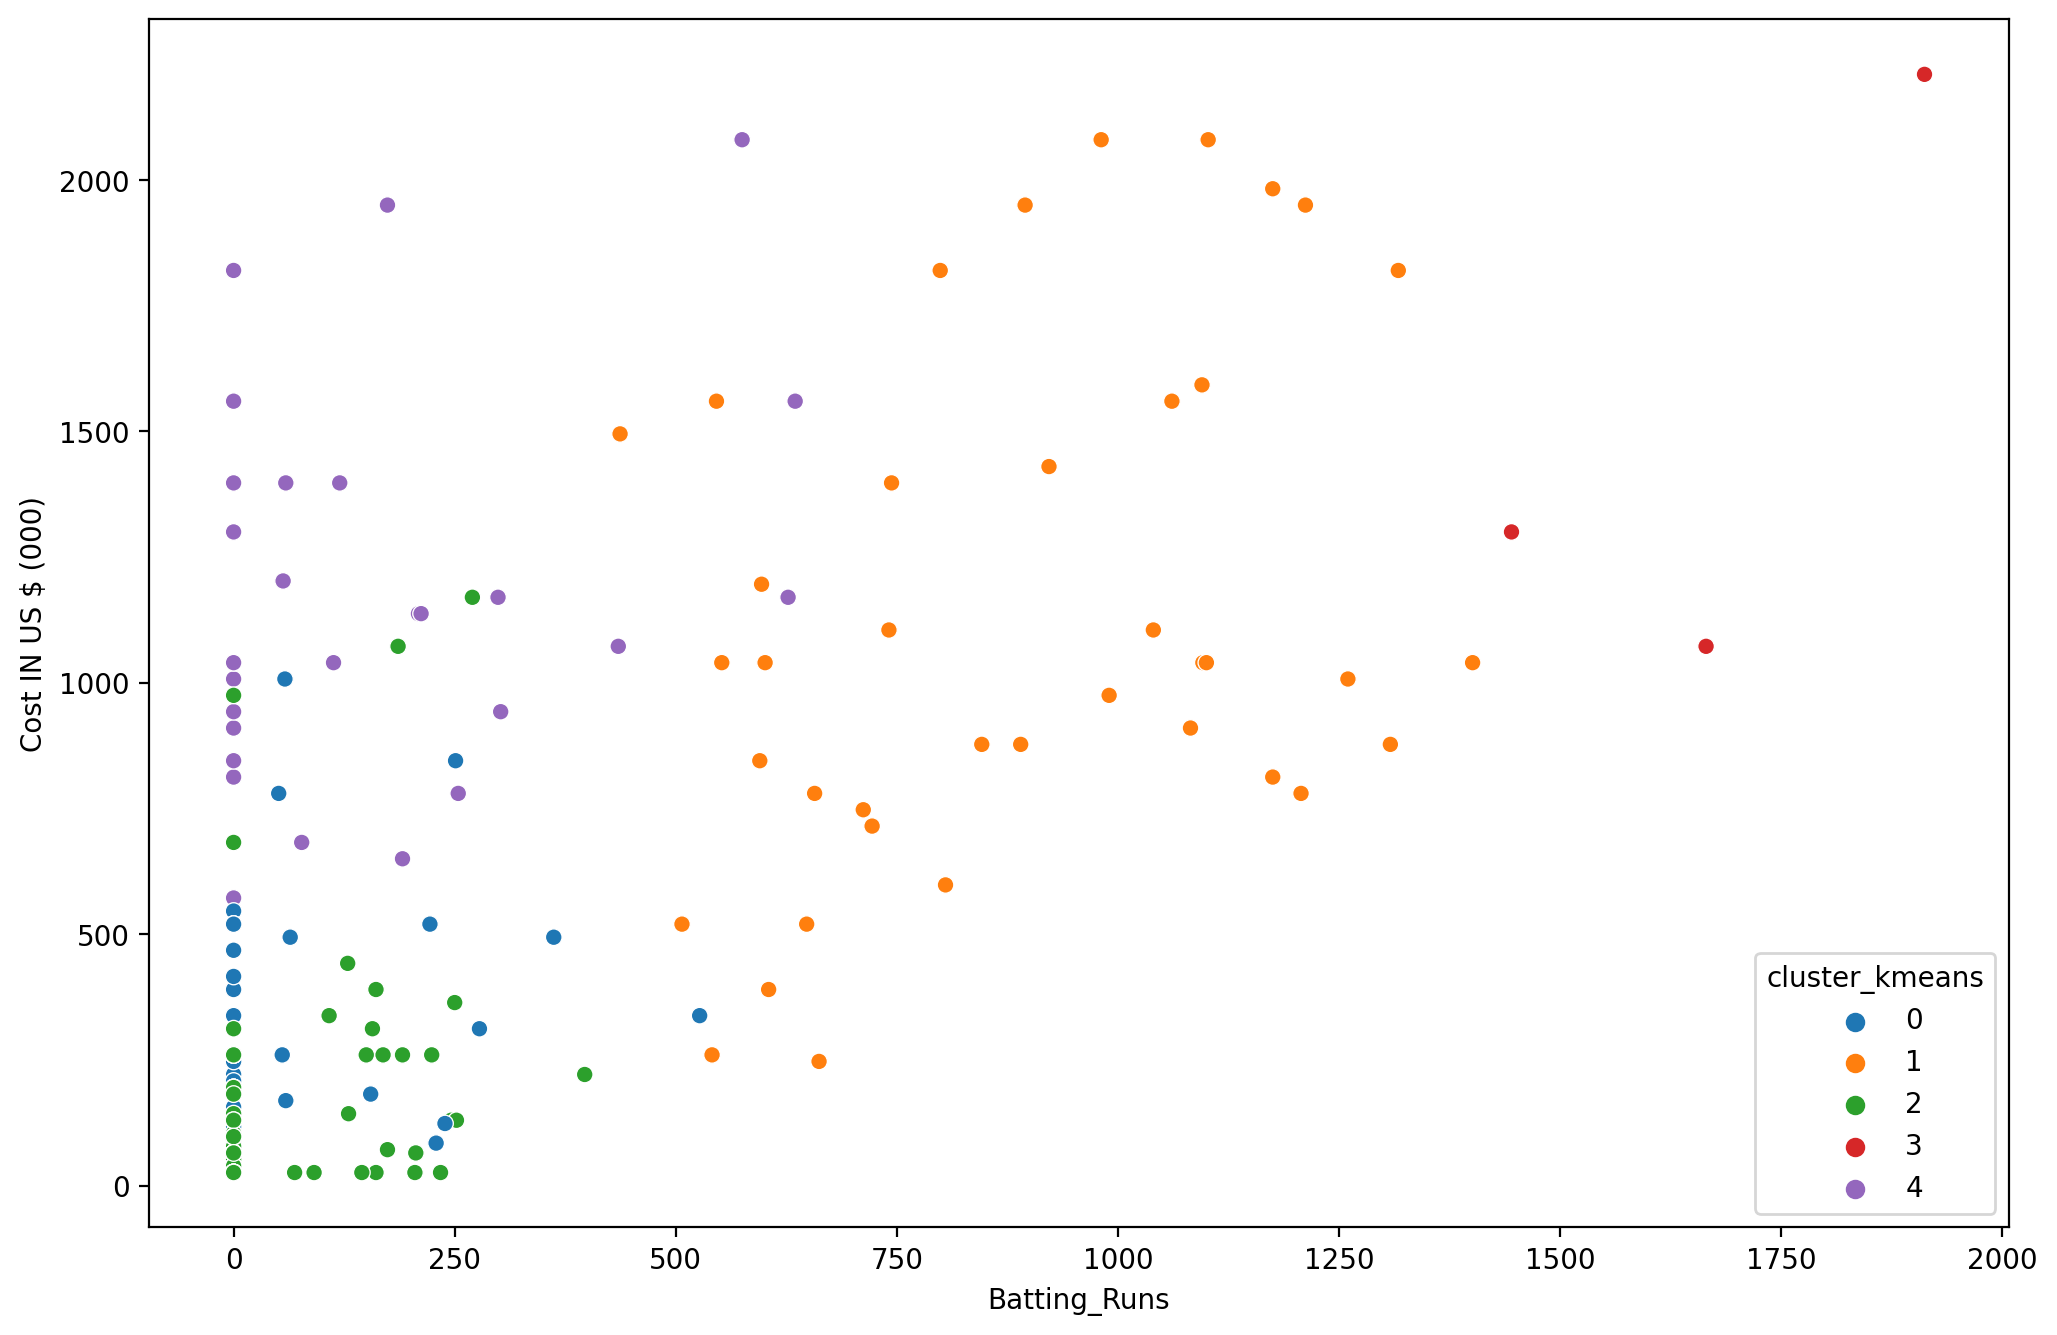

In [76]:
#Plotting the scatter plot for Runs vs cost
plt.figure(figsize=(12,8))

sns.scatterplot(x="Batting_Runs",   y="Cost IN US $ (000)", hue="cluster_kmeans", data=players, palette="tab10")

In [77]:
#Creating a array of column names
cols = ['Batting_SR','Econ']
cols

['Batting_SR', 'Econ']

In [78]:
# final model
kmeans = KMeans(n_clusters=NUM_CLUSTERS, max_iter=50)
kmeans.fit(players_scaled[cols])

# assign the label
players['cluster_kmeans_small'] = kmeans.labels_

<AxesSubplot:xlabel='Batting_SR', ylabel='Econ'>

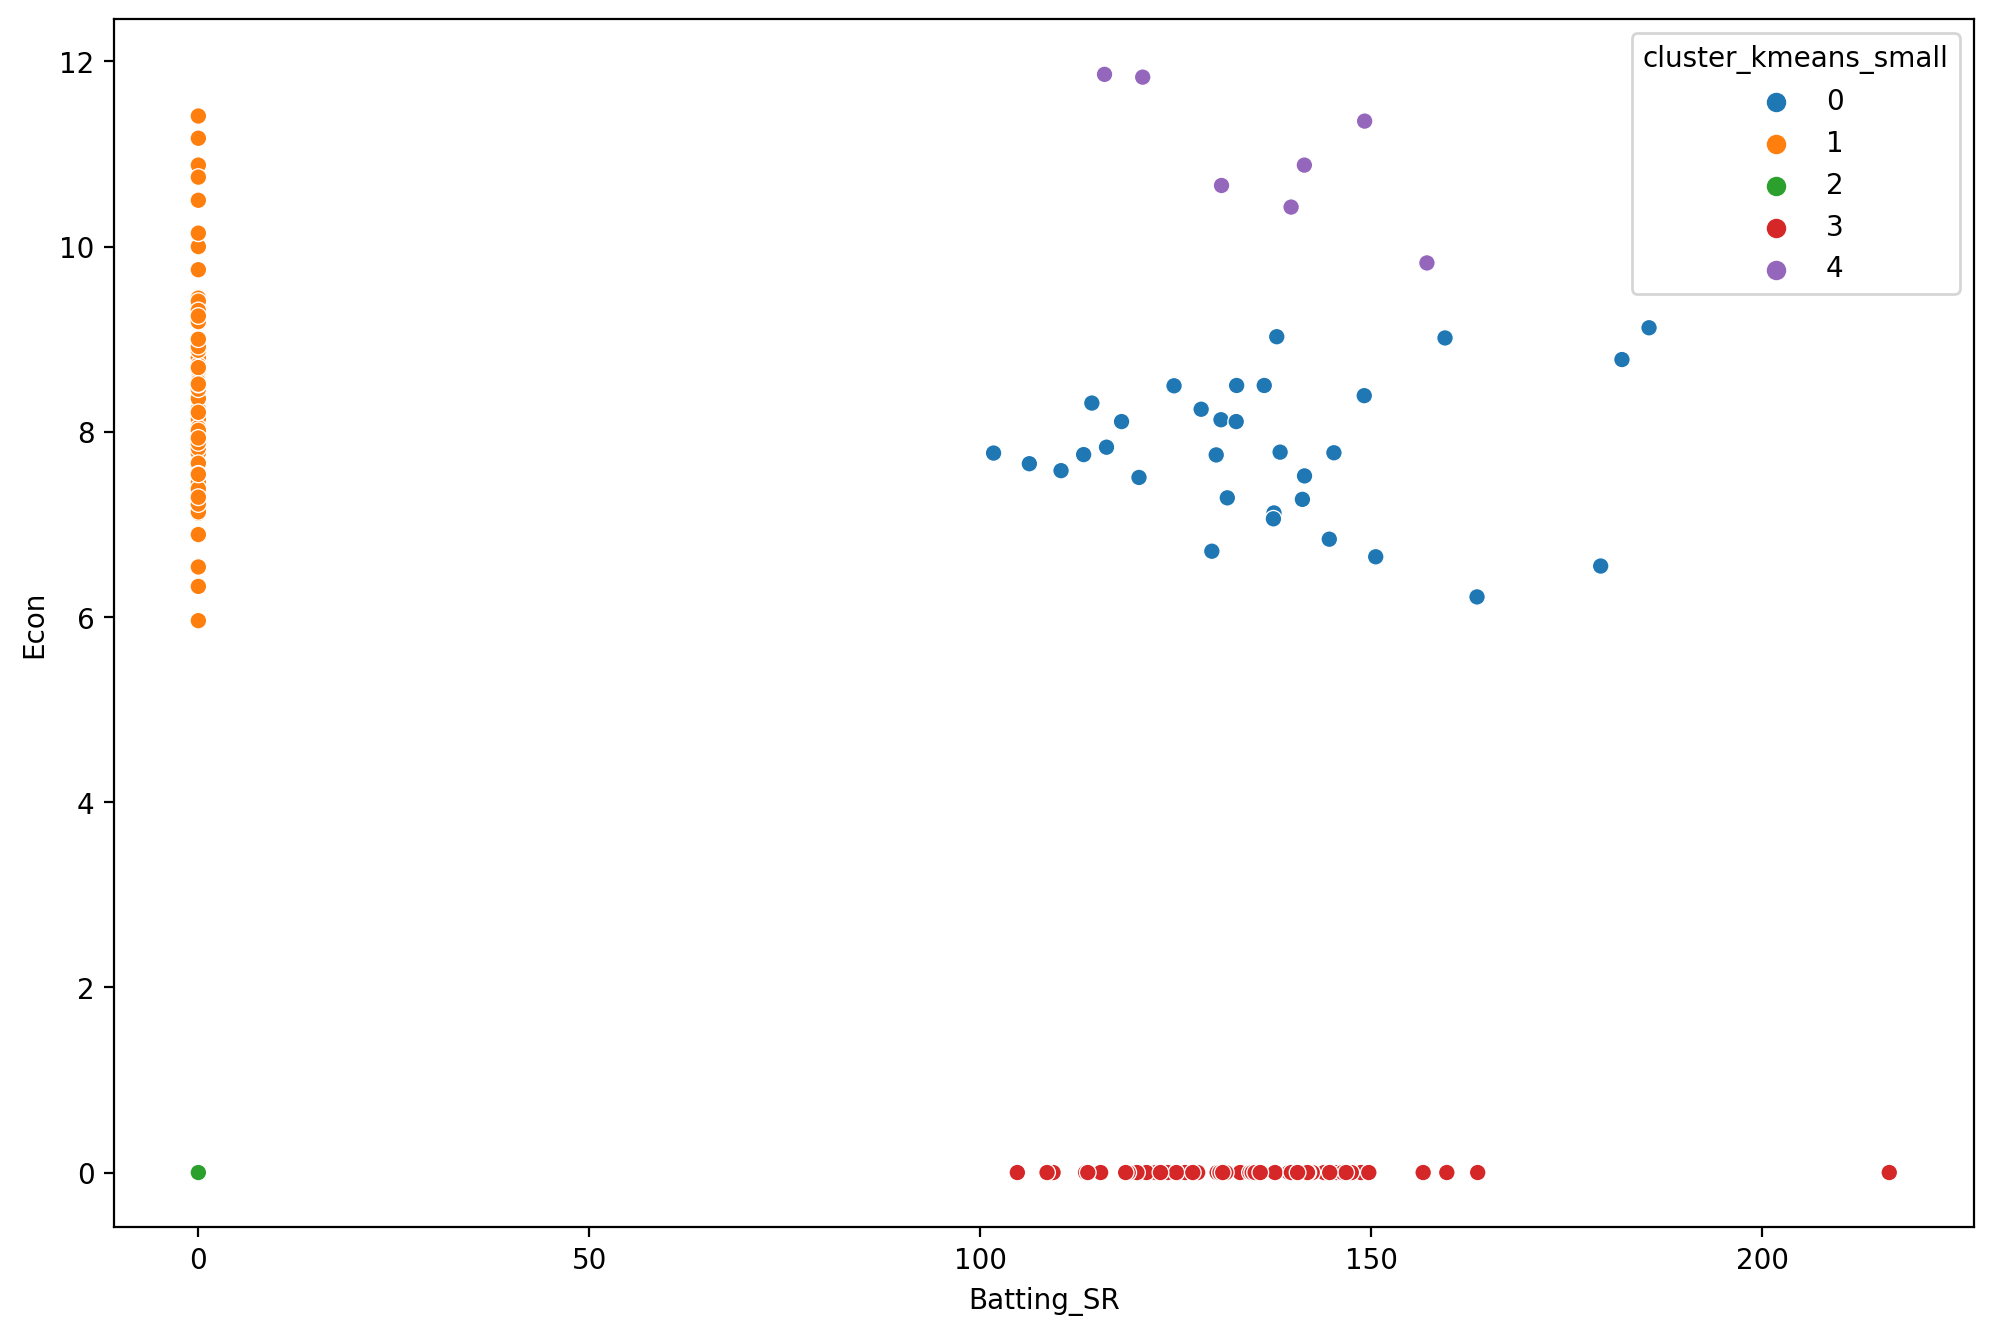

In [79]:
#Plotting the scatter plot for SR vs Econ using K means
plt.figure(figsize=(12,8))

sns.scatterplot(x="Batting_SR",y="Econ", hue="cluster_kmeans_small", data=players, palette="tab10")

In [80]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(players_scaled[cols])
labels = db.labels_

# assign cluster labels
players['cluster_dbscan_avgecon'] = labels

<AxesSubplot:xlabel='Batting_SR', ylabel='Econ'>

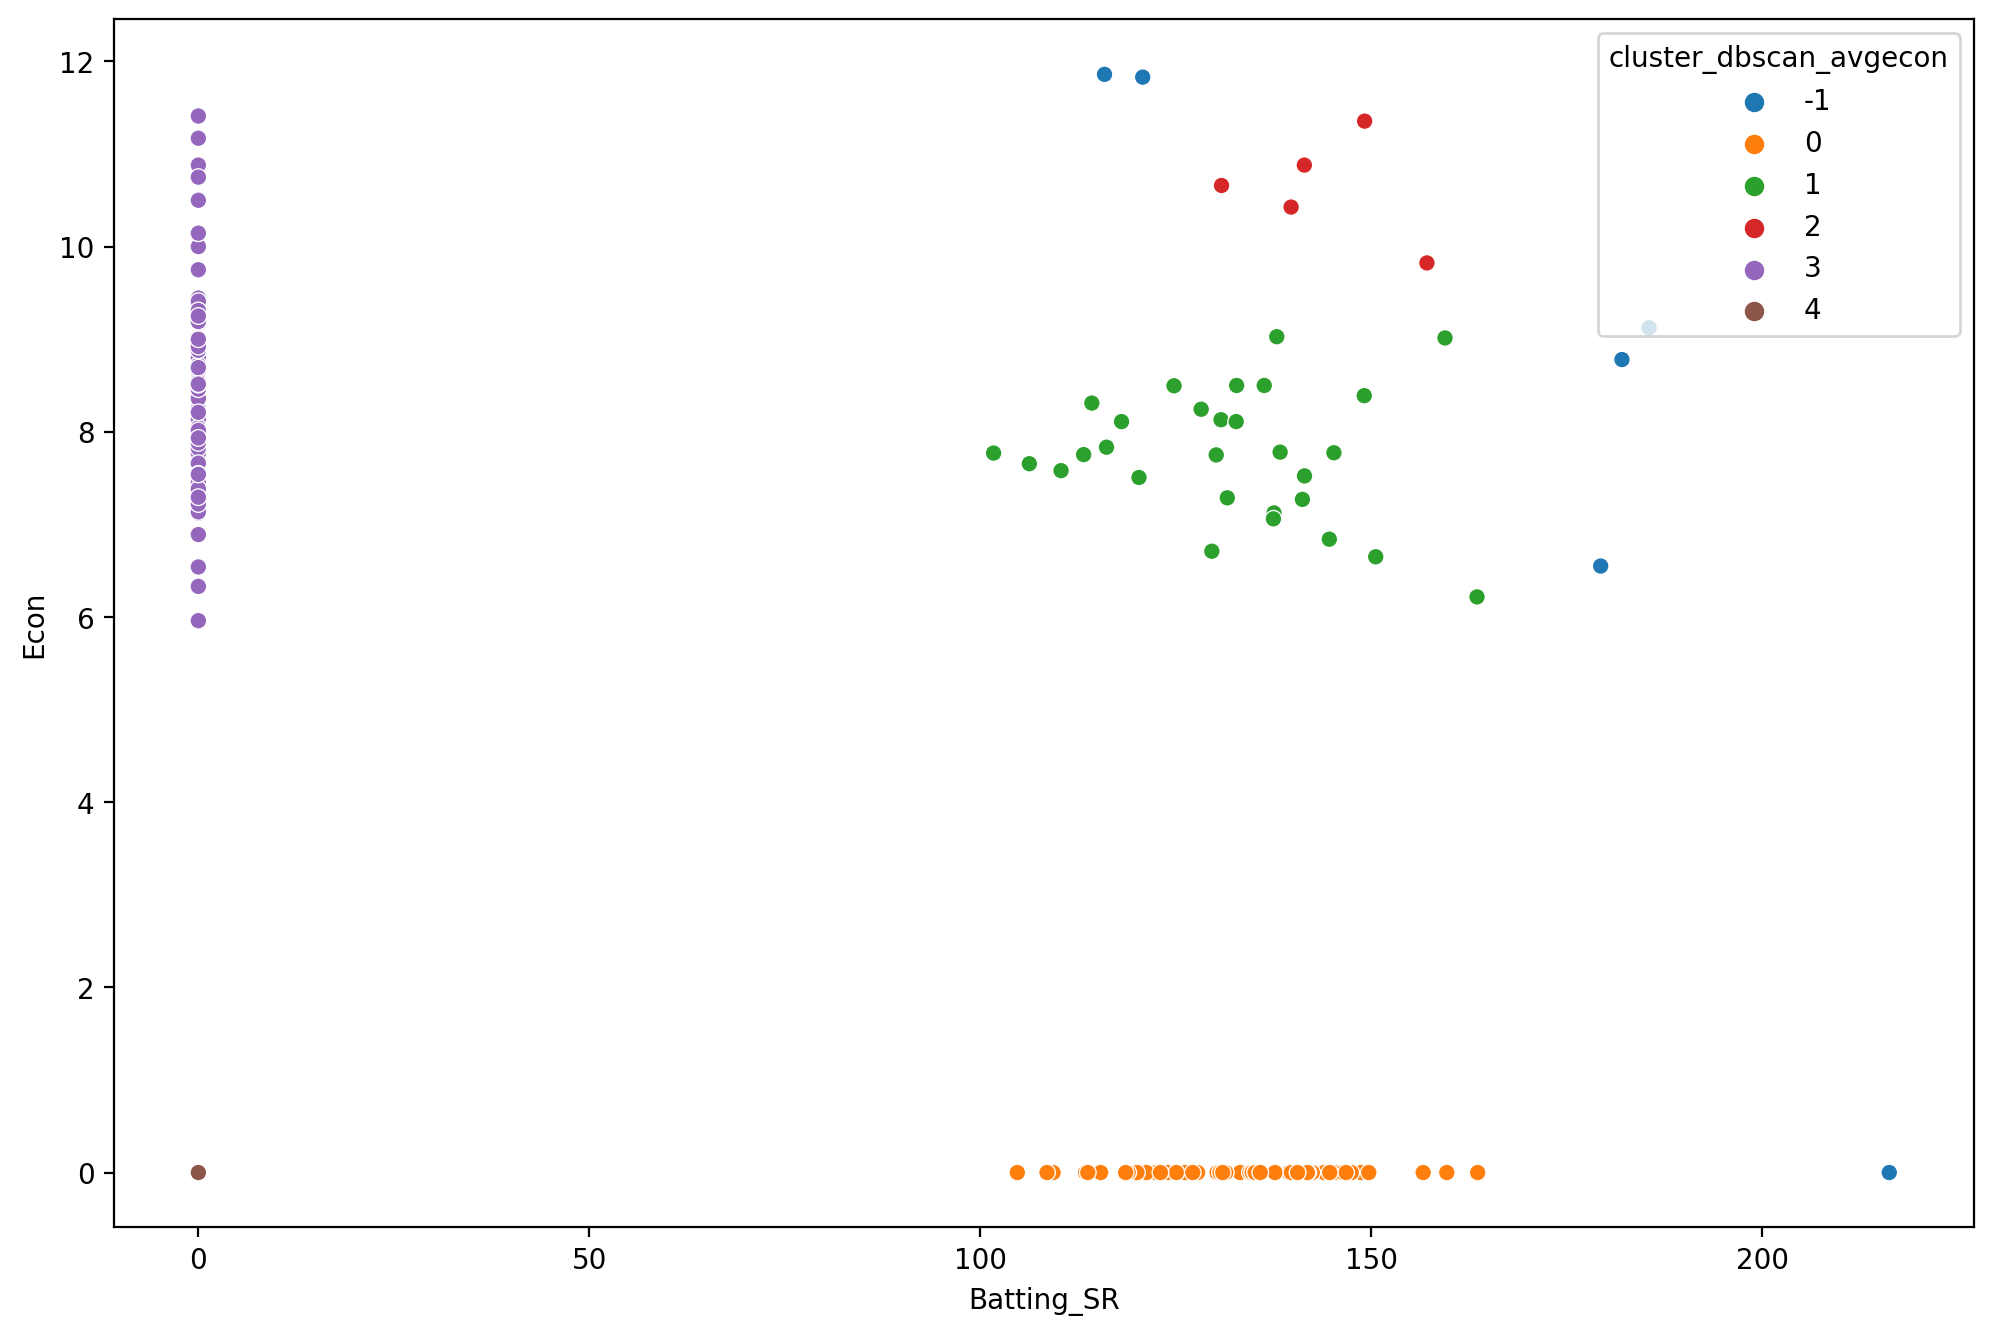

In [81]:
#Plotting the scatter plot for SR vs Econ using DBSCAN
plt.figure(figsize=(12,8))

sns.scatterplot(x="Batting_SR",y="Econ", hue="cluster_dbscan_avgecon", data=players, palette="tab10")

In [82]:
# Default Values
CLUSTERING_TECHNIQUE = 'K-MEANS CLUSTERING'
CLUSTER_COLS = players.columns
CLUSTER_OUTPUT_COL = 'output_kmeans'
#NUM_CLUSTERS = 5
HIERARCHICAL_LINKAGE = 'complete'
b_kmeans_clustering = True
b_hier_clustering = False
b_dbscan_clustering = False

PLOT_X = 'Batting_SR'
PLOT_Y = 'Wkts'
PLOT_SIZE = 'Cost IN US $ (000)'

In [83]:
#Creating a function to display the clustering techniques definition
def display_clustering_description(cluster_technique):
    print(cluster_technique)
    print('-' * len(cluster_technique))
    if(cluster_technique == 'K-MEANS CLUSTERING'):
        print("- K-means is a centroid-based clustering algorithm")
        print("- It requires a pre-specified no. of clusters (k)")
        print("- The points are clustered based on the similarity (usually Euclidian Distance)")
        print("- Check out the 'Cluster Analysis' tab to find the optimal number of clusters")
        print("\n")
    elif(cluster_technique == 'HIERARCHICAL CLUSTERING'):
        print("- Hierarchical clustering builds nested clusters by merging points successively")
        print("- Hierarchical methods can be  either divisive or agglomerative")
        print("- The hierarchy of clusters is represented as a tree diagram known as dendrogram")
        print("- The linkage method defines the distance/similarity calculation")
        print("\n")
    elif(cluster_technique == 'DBSCAN CLUSTERING'):
        print("- DBSCAN: Density-Based Spatial Clustering of Applications with Noise")
        print("- DBSCAN groups together points that are closely packed together")
        print("- It marks points in low-density regions as outliers (noise)")
        print("- DBSCAN requires two key parameters: \n    1. Epsilon: radius to define the neighborhood around a point\n    2. Minimum Points: min neighbors within epsilon radius to form a dense region")
        print("\n")
    else:
        print("INVALID CLUSTERING TECHNIQUE!!")

In [84]:
#Creating a variable to store the array of cost
CLUSTER_COLS = ['Cost IN US $ (000)']
CLUSTER_COLS

['Cost IN US $ (000)']

In [85]:
############## Initializing Widgets ###################
# The Widgets will be seen only if the ipynb file is run

w_ctechnique = widgets.RadioButtons(options=['K-MEANS CLUSTERING', 'HIERARCHICAL CLUSTERING', 'DBSCAN CLUSTERING'],
                                         value=CLUSTERING_TECHNIQUE, description='',
                                         layout={'width': 'max-content'}, 
                                         style={'description_width': 'initial'}, disabled=False)



# K-means Clustering Configurations
# No. of clusters
w_kvalue_kmeans = widgets.BoundedIntText(value=5, min=2, max=10, step=1, description='', disabled=not b_kmeans_clustering )

w_max_iter = widgets.BoundedIntText(
    value=50, min=2, max=1000, step=5, description='', disabled=not b_kmeans_clustering)

# Hierarchical Clustering Configurations
# No. of clusters
w_kvalue_hier = widgets.BoundedIntText(value=5, min=2, max=10, step=1, description='', disabled=not b_hier_clustering )


w_linkage = widgets.Dropdown(options=['single', 'complete', 'average','weighted', 'centroid', 'median','ward'],
                                         value=HIERARCHICAL_LINKAGE, description='',
                                         style={'description_width': 'initial'}, disabled=not b_hier_clustering)

# DBSCAN Clustering Configurations
w_epsilon = widgets.FloatSlider(
    value=0.9, min=0, max=5.0, step=0.1, description='',
    disabled=not b_dbscan_clustering, continuous_update=False, orientation='horizontal',
    readout=True, readout_format='.1f',
    visibility = False
)

w_minpoints = widgets.IntSlider(
    value=5, min=2, max=20, step=1, description='', disabled=not b_dbscan_clustering,
    visibility = False )


# Variables selection
multiselect_layout = widgets.Layout(width='40%')
w_ccolumns = widgets.SelectMultiple(options=ALL_COLUMN_NAMES, description='',
                                        value=CLUSTER_COLS,
                                        rows=len(ALL_COLUMN_NAMES),
                                        #layout=widgets.Layout(width="flex"),
                                        #layout={'width': 'max-content'}, 
                                        #layout=widgets.Layout(display="flex", flex_flow='column'),
                                    layout=widgets.Layout(border='solid', width="50%",display="flex", justify_content="flex-end"),
                                        style={'description_width': 'initial'}, disabled=False)


                                         
button_layout = widgets.Layout(display='flex', flex_flow='column', align_items='stretch', border='solid',
                               width='40%', height='40px')
wbtn_cluster_data = widgets.Button(description="CLUSTER PLAYERS", disabled=False, layout=button_layout,
                                     visibility="visible", button_style="success")

# Scatter plot selection


w_plot_x = widgets.Dropdown(options=ALL_COLUMN_NAMES,
                                         value=PLOT_X, description='',
                                         layout={'width': 'max-content'}, 
                                         style={'description_width': 'initial'}, disabled=False)

w_plot_y = widgets.Dropdown(options=ALL_COLUMN_NAMES,
                                         value=PLOT_Y, description='',
                                         layout={'width': 'max-content'}, 
                                         style={'description_width': 'initial'}, disabled=False)

w_plot_size = widgets.Dropdown(options=ALL_COLUMN_NAMES,
                                         value=PLOT_SIZE, description='',
                                         layout={'width': 'max-content'}, 
                                         style={'description_width': 'initial'}, disabled=False)
wbtn_plot_now = widgets.Button(description="PLOT NOW", disabled=False, layout=button_layout,
                                     visibility="visible", button_style="WARNING")

# Cluster Analysis
w_min_k = widgets.BoundedIntText(
    value=2, min=2, max=20, step=1, description='',layout={'width': 'max-content'}, disabled=False)


w_max_k = widgets.BoundedIntText(
    value=10, min=w_min_k.value, max=20, step=1, description='',layout={'width': 'max-content'}, disabled=False)

w_max_iter_analysis = widgets.BoundedIntText(
    value=50, min=2, max=1000, step=5, description='',layout={'width': 'max-content'}, disabled=False)

wbtn_elbow = widgets.Button(description="ELBOW METHOD", disabled=False, layout=button_layout,
                                     visibility="visible", button_style="WARNING")

wbtn_silhouette = widgets.Button(description="SILHOUETTE SCORE", disabled=False, layout=button_layout,
                                     visibility="visible", button_style="WARNING")


output_clusters = widgets.Output(layout=widgets.Layout(border='solid', width='100%'))
output_plot = widgets.Output(layout=widgets.Layout(border='solid', width='100%'))
output_summary = widgets.Output(layout=widgets.Layout(border='solid', width='100%'))
output_all_stats = widgets.Output(layout=widgets.Layout(border='solid', width='100%'))
output_analysis = widgets.Output(layout=widgets.Layout(border='solid', width='100%')) 
output_desc = widgets.Output(layout=widgets.Layout( width="75%",display="flex", justify_content="flex-end"))    


############## Observe Widgets ###################
def create_clusters(): 
    global CLUSTER_OUTPUT_COL
    if(w_ctechnique.value == 'K-MEANS CLUSTERING'):
        CLUSTER_OUTPUT_COL = 'output_kmeans'
        kmeans_clustering(w_kvalue_kmeans.value,w_max_iter.value,players_scaled[CLUSTER_COLS],players,CLUSTER_OUTPUT_COL)
    elif(w_ctechnique.value == 'HIERARCHICAL CLUSTERING'):
        LINKAGE_METRIC = 'euclidean'  
        CLUSTER_OUTPUT_COL = 'output_hier'
        mergings = hierarchical_clustering(w_linkage.value, LINKAGE_METRIC, w_kvalue_hier.value, players_scaled[CLUSTER_COLS],players,CLUSTER_OUTPUT_COL)      
    elif(w_ctechnique.value == 'DBSCAN CLUSTERING'):
        CLUSTER_OUTPUT_COL = 'output_dbscan'
        dbscan_clustering(w_epsilon.value,w_minpoints.value,players_scaled[CLUSTER_COLS],players,CLUSTER_OUTPUT_COL)
    
    # Add prefix 'cluster' to cluster numbers
    players[CLUSTER_OUTPUT_COL]=players[CLUSTER_OUTPUT_COL].apply(lambda x: x if str(x).startswith('Cluster ')  else  f'Cluster {str(x)}')                                     


def update_output_description(cluster_technique):
    output_desc.clear_output()
    #print(cluster_technique)
    with output_desc:
        display_clustering_description(cluster_technique)
        
def set_cluster_technique( b):
    CLUSTERING_TECHNIQUE = w_ctechnique.value
    #b_with_kvalue = True 
    b_hier_clustering = False
    b_kmeans_clustering = False
    b_dbscan_clustering = False
    if(w_ctechnique.value == 'K-MEANS CLUSTERING'):
        b_kmeans_clustering = True
    elif(w_ctechnique.value == 'HIERARCHICAL CLUSTERING'):
        b_hier_clustering = True
    elif(w_ctechnique.value == 'DBSCAN CLUSTERING'):
        b_dbscan_clustering = True

    w_kvalue_kmeans.disabled = not b_kmeans_clustering
    w_max_iter.disabled = not b_kmeans_clustering
    w_kvalue_hier.disabled = not b_hier_clustering
    w_linkage.disabled = not b_hier_clustering
    w_epsilon.disabled = not b_dbscan_clustering
    w_minpoints.disabled = not b_dbscan_clustering
    
    update_output_description(CLUSTERING_TECHNIQUE)

def set_cluster_columns(b):
    global CLUSTER_COLS
    CLUSTER_COLS = list(w_ccolumns.value)
    

                                         
def on_cluster_players(b):
    tab.selected_index = 0 if tab.selected_index>3 else tab.selected_index
    
    output_clusters.clear_output()
    output_summary.clear_output()
    output_all_stats.clear_output()
    
    create_clusters()  
    with output_plot:
        on_plot_now(b) 

    with output_summary:
        clustering_summary(CLUSTER_OUTPUT_COL)
        
    with output_clusters:
        clustering_data(CLUSTER_OUTPUT_COL)   
        
    with output_all_stats:
        cluster_all_stats(CLUSTER_OUTPUT_COL)
        
        
def display_analysis_widgets():
    display(widgets.VBox([
                    widgets.HBox([widgets.Label("K Minimum : "),w_min_k,
                              widgets.Label("K Maximum : "),w_max_k,
                              widgets.Label("Max Iterations : "),w_max_iter_analysis]),
                    widgets.HBox([wbtn_elbow,
                              wbtn_silhouette])
        
            ]))

    
def on_plot_now(b):
    PLOT_X = w_plot_x.value
    PLOT_Y = w_plot_y.value
    PLOT_SIZE = w_plot_size.value
    output_plot.clear_output()
    with output_plot: 
        display(widgets.HBox([widgets.Label("X : "),w_plot_x,
                              widgets.Label("Y : "),w_plot_y,
                              widgets.Label("Size : "),w_plot_size,
                              wbtn_plot_now]))
        plot_clusters(PLOT_X,PLOT_Y,CLUSTER_OUTPUT_COL,PLOT_SIZE)

        
def on_elbow(b):
    output_analysis.clear_output()
    with output_analysis: 
        display_analysis_widgets()
        elbow_plot(w_min_k.value,w_max_k.value,w_max_iter_analysis.value)
        

def on_silhouette(b):
    output_analysis.clear_output()
    with output_analysis: 
        display_analysis_widgets()
        compute_silhouette_score(players_scaled, w_min_k.value,w_max_k.value,w_max_iter_analysis.value)
        
        
w_ctechnique.observe(set_cluster_technique, names='value')
 

w_ccolumns.observe(set_cluster_columns, names='value') 

wbtn_cluster_data.on_click(on_cluster_players) 
wbtn_plot_now.on_click(on_plot_now) 
wbtn_elbow.on_click(on_elbow) 
wbtn_silhouette.on_click(on_silhouette) 

############## View Widgets ###################
config_item_layout = widgets.Layout(  display='flex', flex_flow='row',justify_content='space-between')
box_layout = widgets.Layout( display='flex', flex_flow='column',  border='solid 2px', align_items='stretch',width='50%')
box_players_layout = widgets.Layout( display='flex', flex_flow='column', align_items='center', border='solid 2px',width='50%')




def get_widget_label(label_text):
    
    return widgets.HTML(value = f"<b><font color='black'>{label_text}</b>")

display(widgets.VBox([
    get_widget_label("ENTER CONFIGURATIONS"),
        widgets.HBox([
            widgets.VBox([get_widget_label("CLUSTERING TECHNIQUE:"), w_ctechnique],
                         layout=widgets.Layout(width='30%', display='flex', align_items='flex-start')), 
            output_desc,
            get_widget_label(""),
        ]),
     
        widgets.HBox([widgets.Label(" "),
         widgets.VBox([
                get_widget_label("K-MEANS CLUSTERING"),
                widgets.Box([widgets.Label("Number of Clusters:"), w_kvalue_kmeans], layout=config_item_layout),
                widgets.Box([widgets.Label("K-means Max Iterations:"),w_max_iter], layout=config_item_layout),
                get_widget_label("HIERARCHICAL CLUSTERING"),
                widgets.Box([widgets.Label("Number of Clusters:"), w_kvalue_hier], layout=config_item_layout),
                widgets.Box([widgets.Label("Hierarchical Linkage Method:"),w_linkage], layout=config_item_layout),
                get_widget_label("DBSCAN CLUSTERING"),
                widgets.Box([widgets.Label("DBSCAN Epsilon:"), w_epsilon], layout=config_item_layout),
                widgets.Box([widgets.Label("DBSCAN Minimum Points:"),w_minpoints], layout=config_item_layout)
         ],layout = box_layout),
         widgets.VBox([get_widget_label("SELECT VARIABLES TO CLUSTER ON:"),w_ccolumns],layout = box_players_layout)])
     ])) 
     

display(widgets.HBox([wbtn_cluster_data]))


# OUTPUT TABS
tab = widgets.Tab([output_plot, output_summary, output_clusters, output_all_stats,output_analysis])
tab.set_title(0, 'Scatter Plot')
tab.set_title(1, 'Clusters Summary')
tab.set_title(2, 'Players in Cluster')
tab.set_title(3, 'Player Stats')
tab.set_title(4, 'Cluster Analysis')
display(tab)
tab.selected_index = 4

with output_analysis:
    display_analysis_widgets()
    
update_output_description(CLUSTERING_TECHNIQUE)   

<AxesSubplot:xlabel='cluster_kmeans', ylabel='Batting_Runs'>

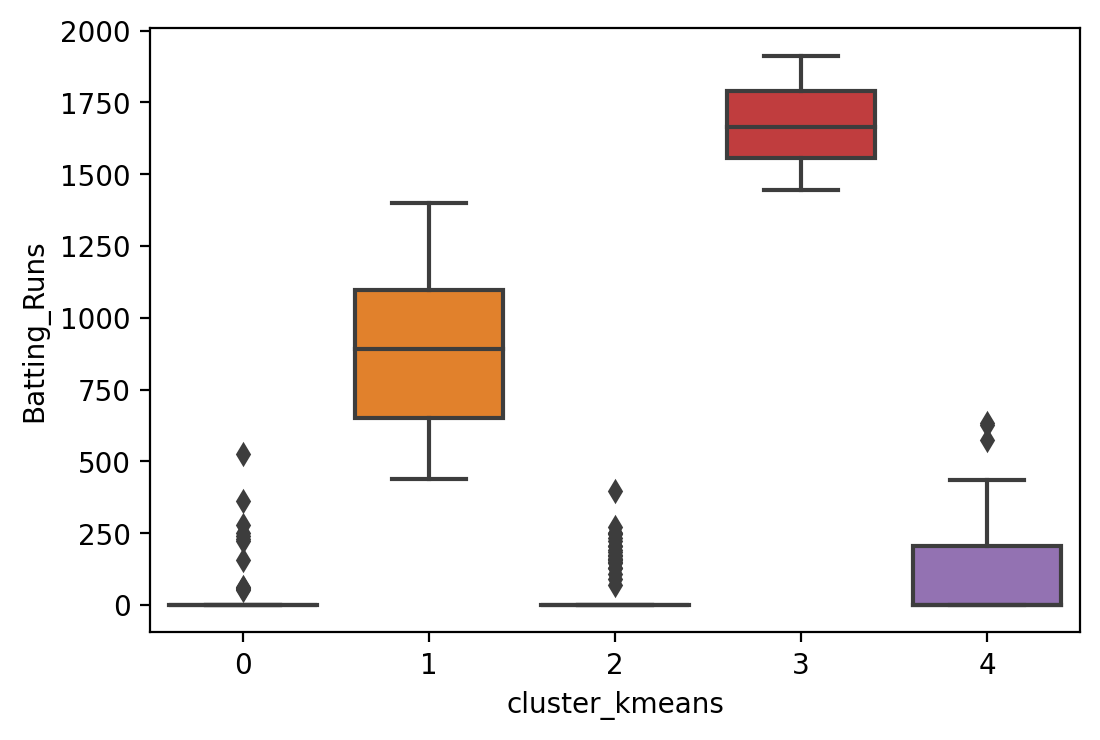

In [86]:
#Box plot for runs using K means
sns.boxplot(x='cluster_kmeans',y='Batting_Runs',data=players)

<AxesSubplot:xlabel='cluster_kmeans', ylabel='Wkts'>

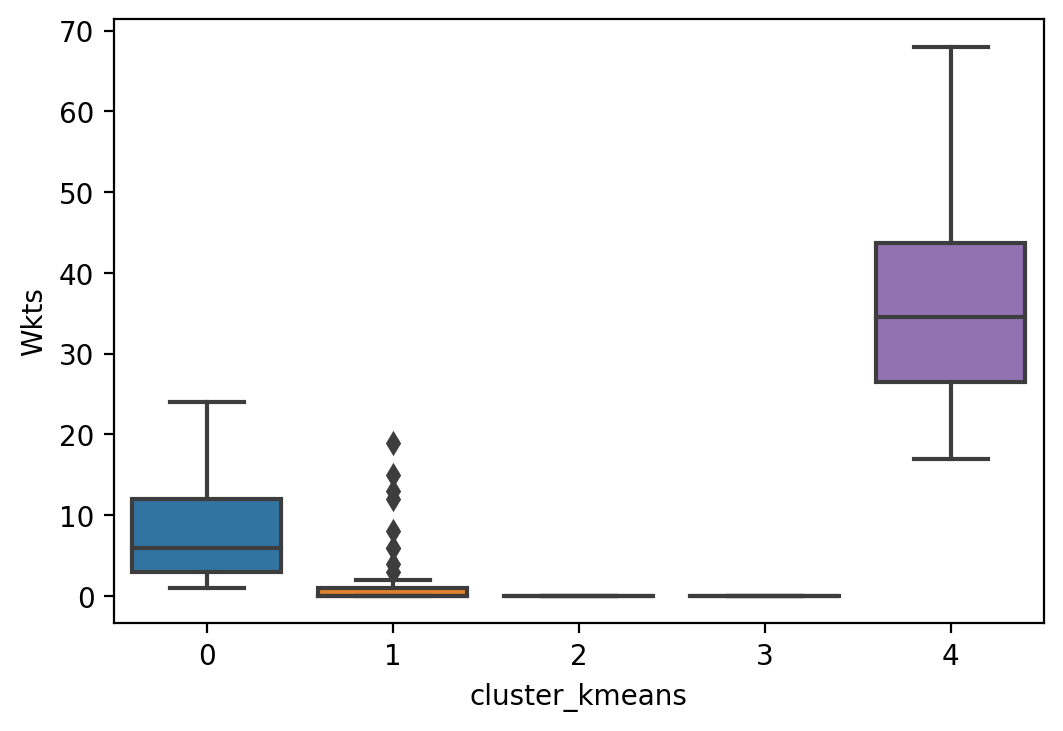

In [87]:
#Box plot for Wickets using K means
sns.boxplot(x='cluster_kmeans',y='Wkts',data=players)

<AxesSubplot:xlabel='cluster_kmeans', ylabel='Cost IN US $ (000)'>

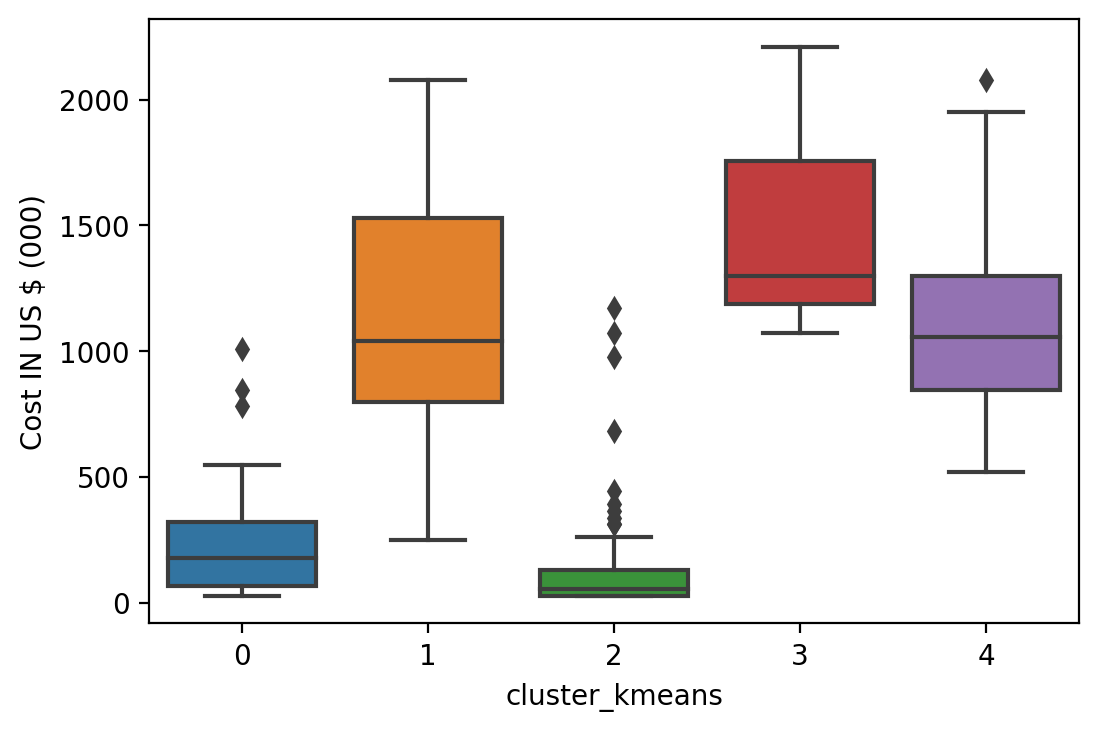

In [88]:
#Box plot for cost in US$ using K means
sns.boxplot(x='cluster_kmeans',y='Cost IN US $ (000)',data=players)